In [1]:
import pandas as pd

In [2]:
data_only_2024 = pd.read_csv('full_data_test.csv')

data_only_2024.head()

DriverNumber Abbreviation_Race    TeamName_Race  Position_Qualifying  \
0             1               VER  Red Bull Racing                  1.0   
1            16               LEC          Ferrari                  2.0   
2            63               RUS         Mercedes                  3.0   
3            55               SAI          Ferrari                  4.0   
4            11               PER  Red Bull Racing                  5.0   

   GridPosition_Race      Q1      Q2      Q3  Qualifying_AvgLapTime  \
0                1.0  90.031  89.374  89.179             102.439455   
1                2.0  90.243  89.165  89.407             101.915500   
2                3.0  90.350  89.922  89.485             108.454091   
3                4.0  89.909  89.573  89.507             100.434364   
4                5.0  90.221  89.932  89.537             103.364500   

   Race_AvgLapTime  ...   AvgGear  OnTrack%  Qualifying_AirTemp  \
0        96.574421  ...  5.169833     100.0           18.055431   
1        97.270368  ...  5.075427     100.0           18.055431   
2        97.395263  ...  5.283257     100.0           18.055431   
3        97.014947  ...  5.172730     100.0           18.055431   
4        96.968404  ...  5.102489     100.0           18.055431   

   Qualifying_Humidity  Qualifying_TrackTemp  Race_AirTemp  Race_Humidity  \
0            46.707865             21.462547     18.003809      49.946856   
1            46.707865             21.462547     18.003809      49.946856   
2            46.707865             21.462547     18.003809      49.946856   
3            46.707865             21.462547     18.003809      49.946856   
4            46.707865             21.462547     18.003809      49.946856   

   Race_TrackTemp           EventName  RacePosition  
0       22.812489  Bahrain Grand Prix           1.0  
1       22.812489  Bahrain Grand Prix           4.0  
2       22.812489  Bahrain Grand Prix           5.0  
3       22.812489  Bahrain Grand Prix           3.0  
4       22.812489  Bahrain Grand Prix           2.0  

[5 rows x 26 columns]

In [3]:
data_only_2024.columns

# Index(['DriverNumber', 'Abbreviation_Race', 'TeamName_Race',
      #  'Position_Qualifying', 'GridPosition_Race', 'Q1', 'Q2', 'Q3',
      #  'Qualifying_AvgLapTime', 'Race_AvgLapTime', 'AvgSpeed', 'MaxSpeed',
      #  'AvgThrottle', 'AvgBrake', 'AvgRPM', 'MaxRPM', 'AvgGear', 'OnTrack%',
      #  'Qualifying_AirTemp', 'Qualifying_Humidity', 'Qualifying_TrackTemp',
      #  'Race_AirTemp', 'Race_Humidity', 'Race_TrackTemp', 'EventName',
      #  'RacePosition'],
      # dtype='object')

Index(['DriverNumber', 'Abbreviation_Race', 'TeamName_Race',
       'Position_Qualifying', 'GridPosition_Race', 'Q1', 'Q2', 'Q3',
       'Qualifying_AvgLapTime', 'Race_AvgLapTime', 'AvgSpeed', 'MaxSpeed',
       'AvgThrottle', 'AvgBrake', 'AvgRPM', 'MaxRPM', 'AvgGear', 'OnTrack%',
       'Qualifying_AirTemp', 'Qualifying_Humidity', 'Qualifying_TrackTemp',
       'Race_AirTemp', 'Race_Humidity', 'Race_TrackTemp', 'EventName',
       'RacePosition'],
      dtype='object')

In [4]:
# We have to fill nan values in the data
data_only_2024.fillna(0, inplace=True)

In [5]:
# Define features and target variable
X_only_2024 = data_only_2024.drop(columns=['RacePosition', 'DriverNumber', 'Abbreviation_Race'])
y_only_2024 = data_only_2024['RacePosition']


In [6]:
numerical_features = X_only_2024.select_dtypes(include=['float64', 'int64']).columns
categorical_features = X_only_2024.select_dtypes(include=['object']).columns


print(numerical_features)
print(categorical_features)


# Index(['Position_Qualifying', 'GridPosition_Race', 'Q1', 'Q2', 'Q3',
#        'Qualifying_AvgLapTime', 'Race_AvgLapTime', 'AvgSpeed', 'MaxSpeed',
#        'AvgThrottle', 'AvgBrake', 'AvgRPM', 'MaxRPM', 'AvgGear', 'OnTrack%',
#        'Qualifying_AirTemp', 'Qualifying_Humidity', 'Qualifying_TrackTemp',
#        'Race_AirTemp', 'Race_Humidity', 'Race_TrackTemp'],
#       dtype='object')
# Index(['TeamName_Race', 'EventName'], dtype='object')

Index(['Position_Qualifying', 'GridPosition_Race', 'Q1', 'Q2', 'Q3',
       'Qualifying_AvgLapTime', 'Race_AvgLapTime', 'AvgSpeed', 'MaxSpeed',
       'AvgThrottle', 'AvgBrake', 'AvgRPM', 'MaxRPM', 'AvgGear', 'OnTrack%',
       'Qualifying_AirTemp', 'Qualifying_Humidity', 'Qualifying_TrackTemp',
       'Race_AirTemp', 'Race_Humidity', 'Race_TrackTemp'],
      dtype='object')
Index(['TeamName_Race', 'EventName'], dtype='object')


In [193]:
# from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.compose import ColumnTransformer

# # Preprocessing for numerical data
# numerical_transformer = StandardScaler()

# # Preprocessing for categorical data
# categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# # Bundle preprocessing for numerical and categorical data
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', numerical_transformer, numerical_features),
#         ('cat', categorical_transformer, categorical_features)
#     ])

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import joblib

# Define the preprocessing pipelines for numerical and categorical features
numerical_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine pipelines into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features)
    ]
)

# Fit the preprocessor on the training data
preprocessor.fit(X_only_2024)

# Save the preprocessor for later use
joblib.dump(preprocessor, 'preprocessor.joblib')




['preprocessor.joblib']

In [194]:
from sklearn.model_selection import GroupShuffleSplit

groups = data_only_2024['EventName']
group_split = GroupShuffleSplit(test_size=0.3, n_splits=1, random_state=42)

train_idx, test_idx = next(group_split.split(X_only_2024, y_only_2024, groups=groups))

X_train = X_only_2024.iloc[train_idx]
X_test = X_only_2024.iloc[test_idx]
y_train = y_only_2024.iloc[train_idx]
y_test = y_only_2024.iloc[test_idx]

X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [12]:
from keras.src.models import Sequential
from keras.src.layers import Dense, Dropout
from keras.src.regularizers import L2
import keras_tuner as kt
from keras.src.optimizers import Adam
from keras.src.callbacks import EarlyStopping

def build_model(hp):
    model = Sequential()

    # Tune the number of layers and units
    for i in range(hp.Int('num_layers', 1, 4)):
        model.add(Dense(
            units=hp.Int(f'units_{i}', min_value=32, max_value=512, step=32),
            activation='relu',
            kernel_regularizer=L2(hp.Float('l2', 1e-5, 1e-2, sampling='log'))
        ))
        # Tune dropout rate
        model.add(Dropout(rate=hp.Float(f'dropout_{i}', 0.0, 0.5, step=0.1)))

    model.add(Dense(1))  # Output layer for regression

    # Tune the learning rate
    model.compile(
        optimizer=Adam(
            learning_rate=hp.Float('learning_rate', 1e-4, 1e-2, sampling='log')
        ),
        loss='mean_squared_error',
        metrics=['mae']
    )

    return model


tuner = kt.RandomSearch(
    build_model,
    objective='val_mae',
    max_trials=50,  # Number of hyperparameter combinations to try
    executions_per_trial=1,
    directory='hyperparam_tuning',
    project_name='race_outcome_prediction_v5'
)

tuner.search(
    X_train_processed, y_train,
    epochs=50,
    validation_data=(X_test_processed, y_test),
    callbacks=[EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)]
)

best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
Пошук гіперпараметрів завершено.
Оптимальна кількість шарів: {best_hps.get('num_layers')}
""")

for i in range(best_hps.get('num_layers')):
    print(f"Одиниць у шарі {i}: {best_hps.get(f'units_{i}')}")
    print(f"Ступінь випадкового виключення у шарі {i}: {best_hps.get(f'dropout_{i}')}")

print(f"Оптимальна швидкість навчання: {best_hps.get('learning_rate')}")
print(f"Оптимальна L2 регуляризація: {best_hps.get('l2')}")

# Trial 50 Complete [00h 00m 02s]
# val_mae: 3.7882847785949707

# Best val_mae So Far: 2.9573140144348145
# Total elapsed time: 00h 01m 26s

# Пошук гіперпараметрів завершено.
# Оптимальна кількість шарів: 4

# Одиниць у шарі 0: 224
# Ступінь випадкового виключення у шарі 0: 0.30000000000000004
# Одиниць у шарі 1: 96
# Ступінь випадкового виключення у шарі 1: 0.4
# Одиниць у шарі 2: 448
# Ступінь випадкового виключення у шарі 2: 0.4
# Одиниць у шарі 3: 128
# Ступінь випадкового виключення у шарі 3: 0.30000000000000004
# Оптимальна швидкість навчання: 0.004018615305666302
# Оптимальна L2 регуляризація: 5.959382229337249e-05

Reloading Tuner from hyperparam_tuning/race_outcome_prediction_v5/tuner0.json

Пошук гіперпараметрів завершено.
Оптимальна кількість шарів: 4

Одиниць у шарі 0: 224
Ступінь випадкового виключення у шарі 0: 0.30000000000000004
Одиниць у шарі 1: 96
Ступінь випадкового виключення у шарі 1: 0.4
Одиниць у шарі 2: 448
Ступінь випадкового виключення у шарі 2: 0.4
Одиниць у шарі 3: 128
Ступінь випадкового виключення у шарі 3: 0.30000000000000004
Оптимальна швидкість навчання: 0.004018615305666302
Оптимальна L2 регуляризація: 5.959382229337249e-05


In [13]:
model_only_2024 = tuner.hypermodel.build(best_hps)

model_only_2024.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

history = model_only_2024.fit(
    X_train_processed, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(X_test_processed, y_test),
    callbacks=[EarlyStopping(monitor='val_loss', patience=5)]
)

test_loss, test_mae = model_only_2024.evaluate(X_test_processed, y_test)
print(f"Середня абсолютна помилка після налаштування: {test_mae}")

y_pred = model_only_2024.predict(X_test_processed).flatten()

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Середня абсолютна помилка після налаштування: {mae}")
print(f"Середньоквадратична помилка після налаштування: {mse}")

# Середня абсолютна помилка після налаштування: 3.344792693638973
# Середньоквадратична помилка після налаштування: 21.238264733580085

Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 15.6386 - mae: 2.9041 - val_loss: 25.3551 - val_mae: 3.5317
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11.2236 - mae: 2.4840 - val_loss: 22.4602 - val_mae: 3.4431
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 15.7867 - mae: 3.1425 - val_loss: 23.0318 - val_mae: 3.6620
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 14.2683 - mae: 2.9252 - val_loss: 22.4606 - val_mae: 3.4466
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13.2280 - mae: 2.7094 - val_loss: 18.8539 - val_mae: 3.1893
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13.1452 - mae: 2.7311 - val_loss: 19.2107 - val_mae: 3.2014
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12.0518 - mae: 2.6623 - val_loss: 22.7551 - val_mae: 3.5779
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 10.3623 - mae: 2.4454 - val_loss: 21.4959 - val_mae: 3.3264
Epoch 9/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12.8232

In [16]:
tuner_bayes = kt.BayesianOptimization(
    build_model,
    objective='val_mae',
    max_trials=50,
    executions_per_trial=1,
    directory='hyperparam_tuning',
    project_name='race_outcome_prediction_bayesian_v5'
)

tuner_bayes.search(
    X_train_processed, y_train,
    epochs=50,
    validation_data=(X_test_processed, y_test),
    callbacks=[EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)]
)

best_bayes = tuner_bayes.get_best_hyperparameters(num_trials=1)[0]

print(f"""
Пошук гіперпараметрів завершено.
Оптимальна кількість шарів: {best_bayes.get('num_layers')}
""")

for i in range(best_bayes.get('num_layers')):
    print(f"Одиниць у шарі {i}: {best_bayes.get(f'units_{i}')}")
    print(f"Ступінь випадкового виключення у шарі {i}: {best_bayes.get(f'dropout_{i}')}")

print(f"Оптимальна швидкість навчання: {best_bayes.get('learning_rate')}")
print(f"Оптимальна L2 регуляризація: {best_bayes.get('l2')}")

# Trial 50 Complete [00h 00m 01s]
# val_mae: 3.0578370094299316

# Best val_mae So Far: 2.7557373046875
# Total elapsed time: 00h 01m 45s

# Пошук гіперпараметрів завершено.
# Оптимальна кількість шарів: 1

# Одиниць у шарі 0: 32
# Ступінь випадкового виключення у шарі 0: 0.4
# Оптимальна швидкість навчання: 0.004782203154550918
# Оптимальна L2 регуляризація: 0.007313069311526014

Trial 50 Complete [00h 00m 01s]
val_mae: 3.0578370094299316

Best val_mae So Far: 2.7557373046875
Total elapsed time: 00h 01m 45s

Пошук гіперпараметрів завершено.
Оптимальна кількість шарів: 1

Одиниць у шарі 0: 32
Ступінь випадкового виключення у шарі 0: 0.4
Оптимальна швидкість навчання: 0.004782203154550918
Оптимальна L2 регуляризація: 0.007313069311526014


In [17]:
model_bayes_only_2024 = tuner_bayes.hypermodel.build(best_bayes)

model_bayes_only_2024.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [18]:
history_bayes = model_bayes_only_2024.fit(
    X_train_processed, y_train,
    epochs=100,
    validation_data=(X_test_processed, y_test),
    callbacks=[EarlyStopping(monitor='val_loss', patience=5)]
)

test_loss_bayes, test_mae_bayes = model_bayes_only_2024.evaluate(X_test_processed, y_test)
print(f"Середня абсолютна помилка після налаштування: {test_mae_bayes}")

y_pred_bayes = model_bayes_only_2024.predict(X_test_processed).flatten()

mae_bayes = mean_absolute_error(y_test, y_pred_bayes)
mse_bayes = mean_squared_error(y_test, y_pred_bayes)
r2_bayes = r2_score(y_test, y_pred_bayes)

print(f"Середня абсолютна помилка після налаштування: {mae_bayes}")
print(f"Середньоквадратична помилка після налаштування: {mse_bayes}")

# Середня абсолютна помилка після налаштування: 3.031848122747682
# Середньоквадратична помилка після налаштування: 19.083547217461856

Epoch 1/100


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 149.5353 - mae: 10.6466 - val_loss: 135.6499 - val_mae: 10.2226
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 138.2346 - mae: 10.2907 - val_loss: 114.7703 - val_mae: 9.2535
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 112.4047 - mae: 9.0416 - val_loss: 96.1798 - val_mae: 8.3262
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 94.5473 - mae: 8.2310 - val_loss: 78.0041 - val_mae: 7.3524
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 79.5507 - mae: 7.2860 - val_loss: 60.6333 - val_mae: 6.3108
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 55.1717 - mae: 5.9727 - val_loss: 45.0439 - val_mae: 5.2377
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 45.4195 - mae: 5.2129 - val_loss: 33.5891 - val_mae: 4.4216
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 41.6560 - mae: 4.8127 - val_loss: 26.9604 - val_mae: 3.8810
Epoch 9/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 27.2538 - 

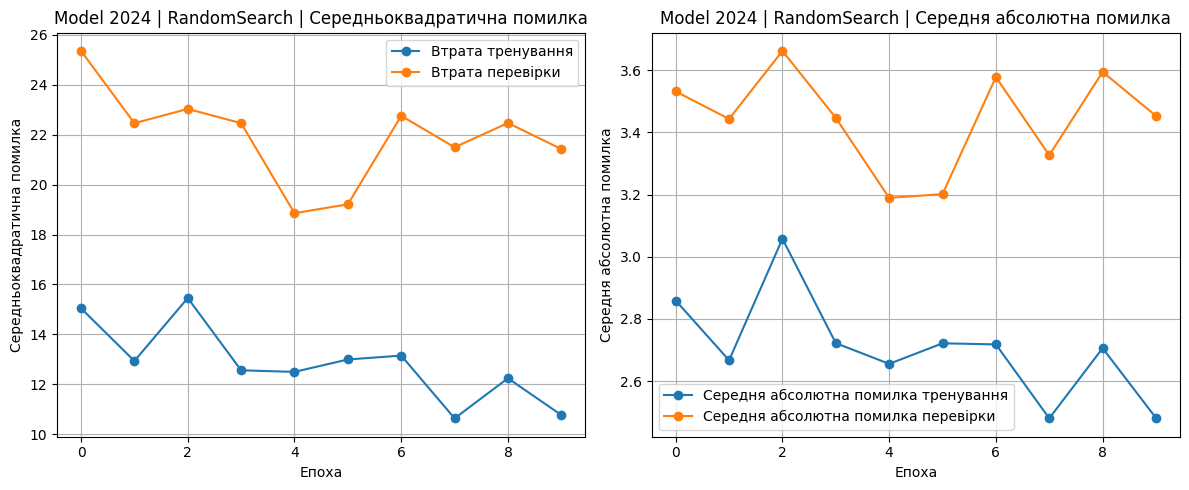

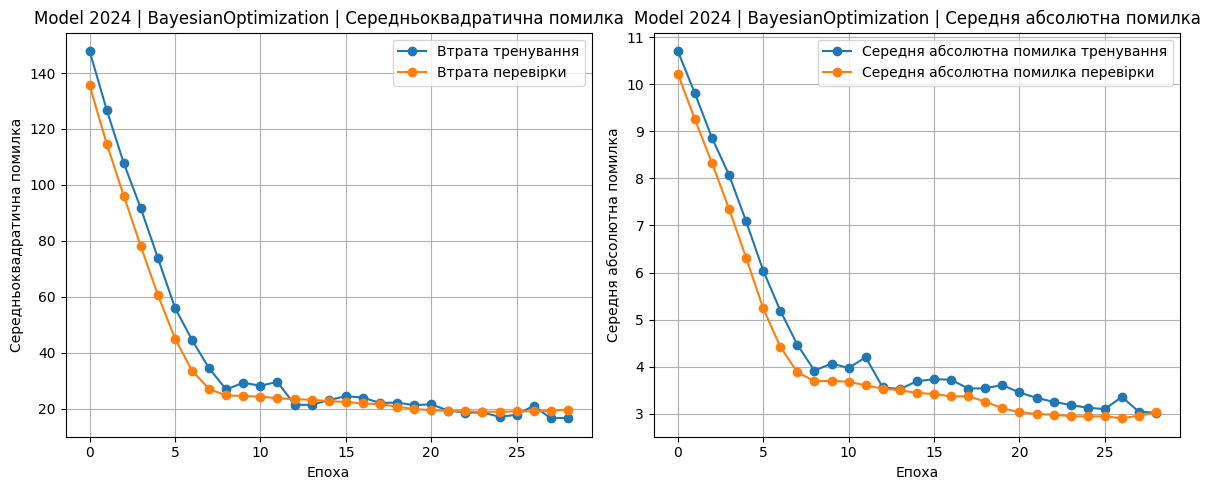

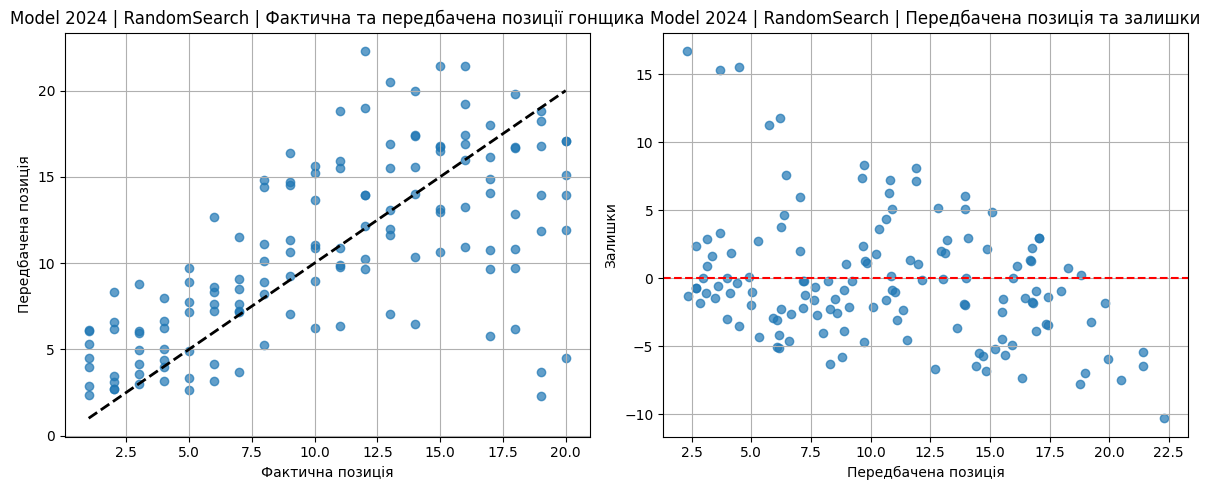

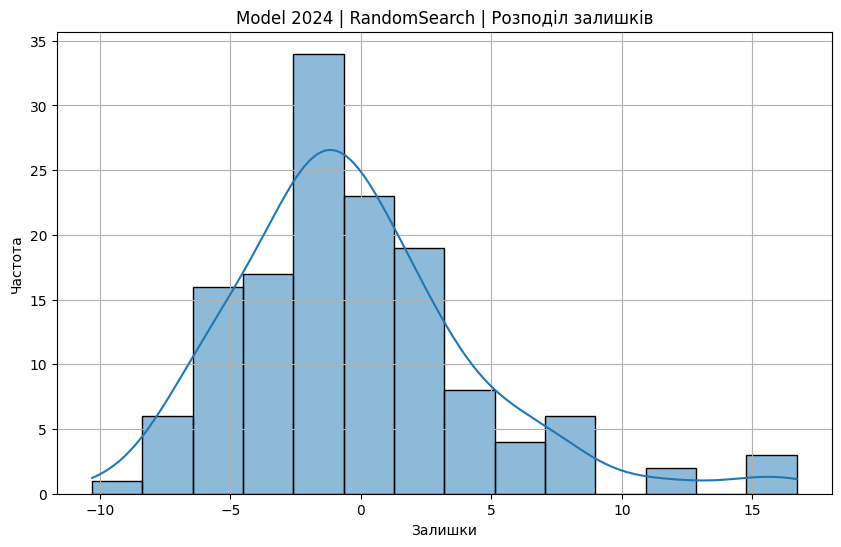

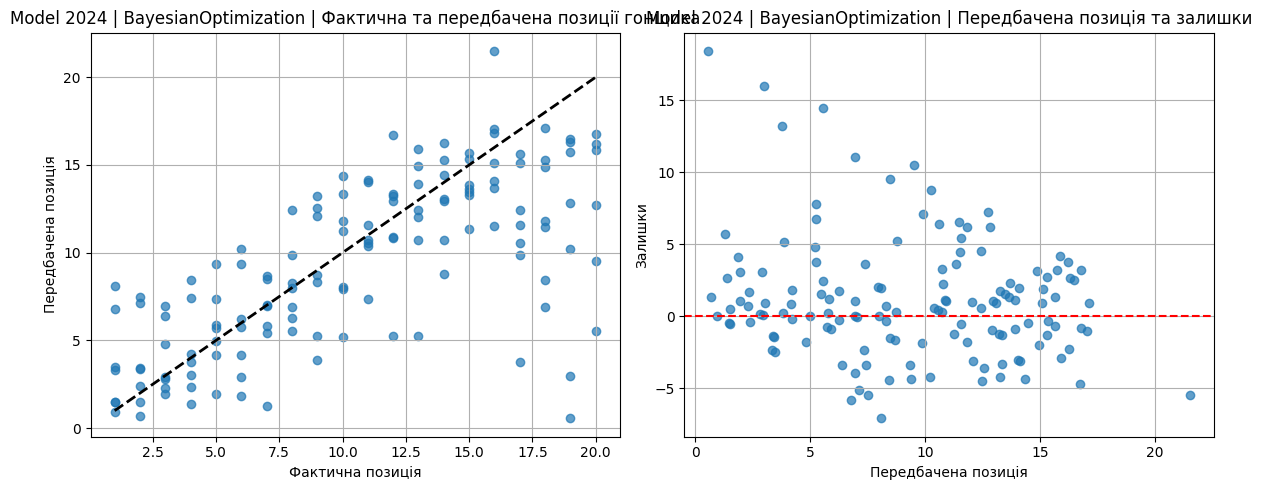

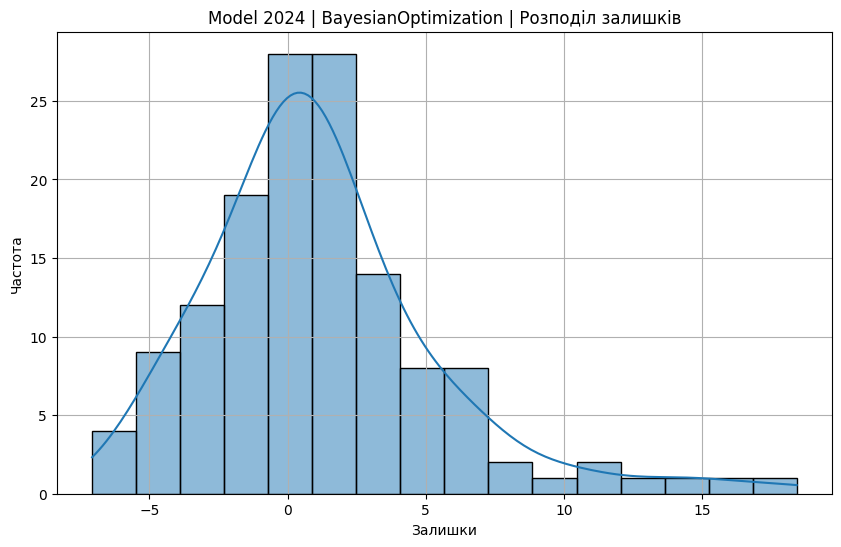

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_training_history(history, model_name):
    # Plot Loss
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Втрата тренування', marker='o')
    plt.plot(history.history['val_loss'], label='Втрата перевірки', marker='o')
    plt.title(f'{model_name} | Середньоквадратична помилка')
    plt.xlabel('Епоха')
    plt.ylabel('Середньоквадратична помилка')
    plt.legend()
    plt.grid(True)

    # Plot MAE
    plt.subplot(1, 2, 2)
    plt.plot(history.history['mae'], label='Середня абсолютна помилка тренування', marker='o')
    plt.plot(history.history['val_mae'], label='Середня абсолютна помилка перевірки', marker='o')
    plt.title(f'{model_name} | Середня абсолютна помилка')
    plt.xlabel('Епоха')
    plt.ylabel('Середня абсолютна помилка')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

def plot_predictions(y_test, y_pred, model_name):
    # Actual vs. Predicted
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.scatter(y_test, y_pred, alpha=0.7)
    plt.title(f'{model_name} | Фактична та передбачена позиції гонщика')
    plt.xlabel('Фактична позиція')
    plt.ylabel('Передбачена позиція')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    plt.grid(True)

    # Residuals
    residuals = y_test - y_pred
    plt.subplot(1, 2, 2)
    plt.scatter(y_pred, residuals, alpha=0.7)
    plt.title(f'{model_name} | Передбачена позиція та залишки')
    plt.xlabel('Передбачена позиція')
    plt.ylabel('Залишки')
    plt.axhline(y=0, color='r', linestyle='--')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

    # Distribution of Residuals
    plt.figure(figsize=(10, 6))
    sns.histplot(residuals, kde=True)
    plt.title(f'{model_name} | Розподіл залишків')
    plt.xlabel('Залишки')
    plt.ylabel('Частота')
    plt.grid(True)
    plt.show()

# Use the functions
plot_training_history(history, 'Model 2024 | RandomSearch')
plot_training_history(history_bayes, 'Model 2024 | BayesianOptimization')

plot_predictions(y_test, y_pred, 'Model 2024 | RandomSearch')
plot_predictions(y_test, y_pred_bayes, 'Model 2024 | BayesianOptimization')


In [20]:
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.utils.validation import check_is_fitted

class KerasRegressorWrapper(BaseEstimator, RegressorMixin):
    def __init__(self, model):
        self.model = model
        self._estimator_type = 'regressor'  # Indicate that this is a regressor

    def fit(self, X, y):
        # Since the model is already trained, we don't need to fit it again
        # However, we need to set n_features_in_ for scikit-learn compatibility
        self.n_features_in_ = X.shape[1]
        return self

    def predict(self, X):
        check_is_fitted(self, 'n_features_in_')
        return self.model.predict(X).flatten()


In [21]:
from scikeras.wrappers import KerasRegressor

# Create the wrapper
estimator = KerasRegressorWrapper(model_only_2024)
estimator.fit(X_train_processed, y_train)  # This sets n_features_in_


estimator_bayes = KerasRegressorWrapper(model_bayes_only_2024)
estimator_bayes.fit(X_train_processed, y_train)  # This sets n_features_in_


KerasRegressorWrapper(model=<Sequential name=sequential_1, built=True>)

In [22]:
from sklearn.inspection import permutation_importance

# Compute permutation feature importance
result = permutation_importance(
    estimator, X_test_processed, y_test, n_repeats=10, random_state=42, scoring='neg_mean_absolute_error'
)


result_bayes = permutation_importance(
    estimator_bayes, X_test_processed, y_test, n_repeats=10, random_state=42, scoring='neg_mean_absolute_error'
)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 574us/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 707us/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 701us/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 529us/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 543us/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 562us/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 627us/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 548us/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 584us/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 569us/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 525us/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 640us/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 672us/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 719us/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 540us/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 542us/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 629us/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 524us/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 554us/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 509us/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 627us/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 513us/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 580us/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 522us/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0

In [23]:
# Extract feature names from the preprocessor
feature_names = preprocessor.get_feature_names_out()

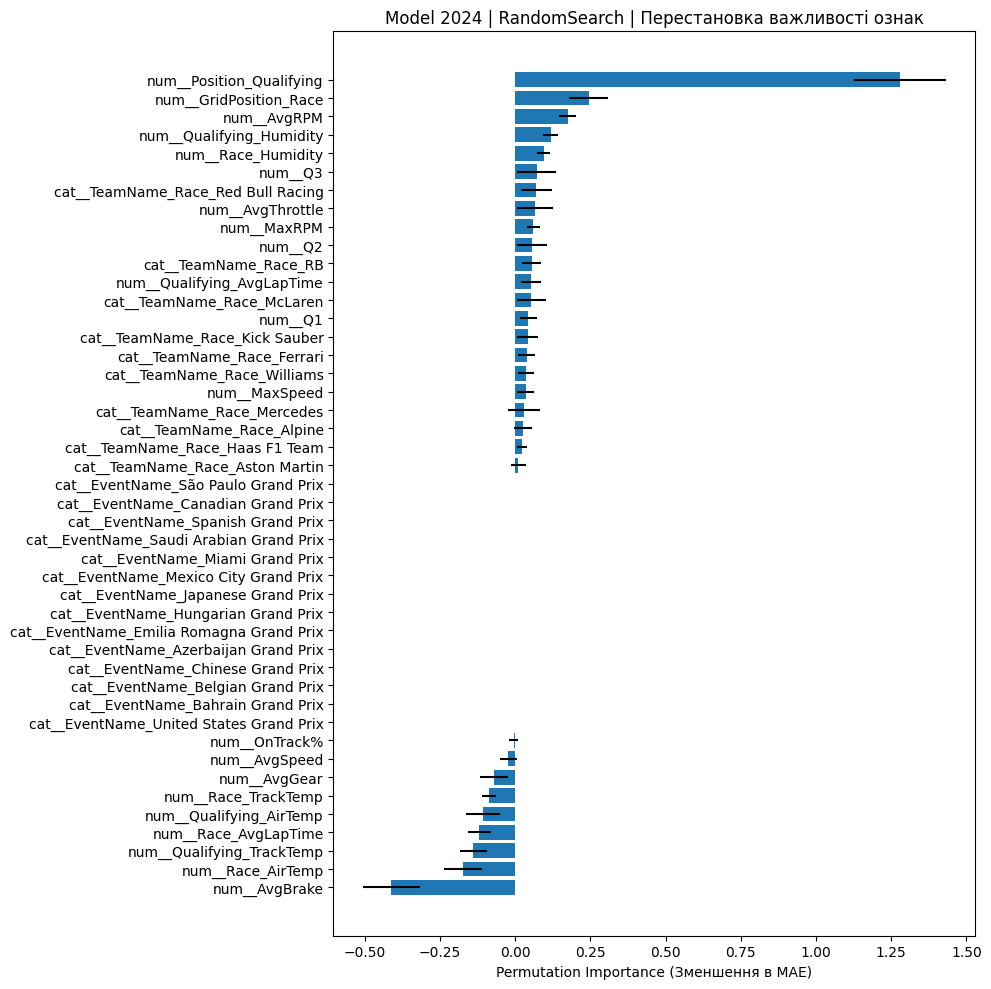

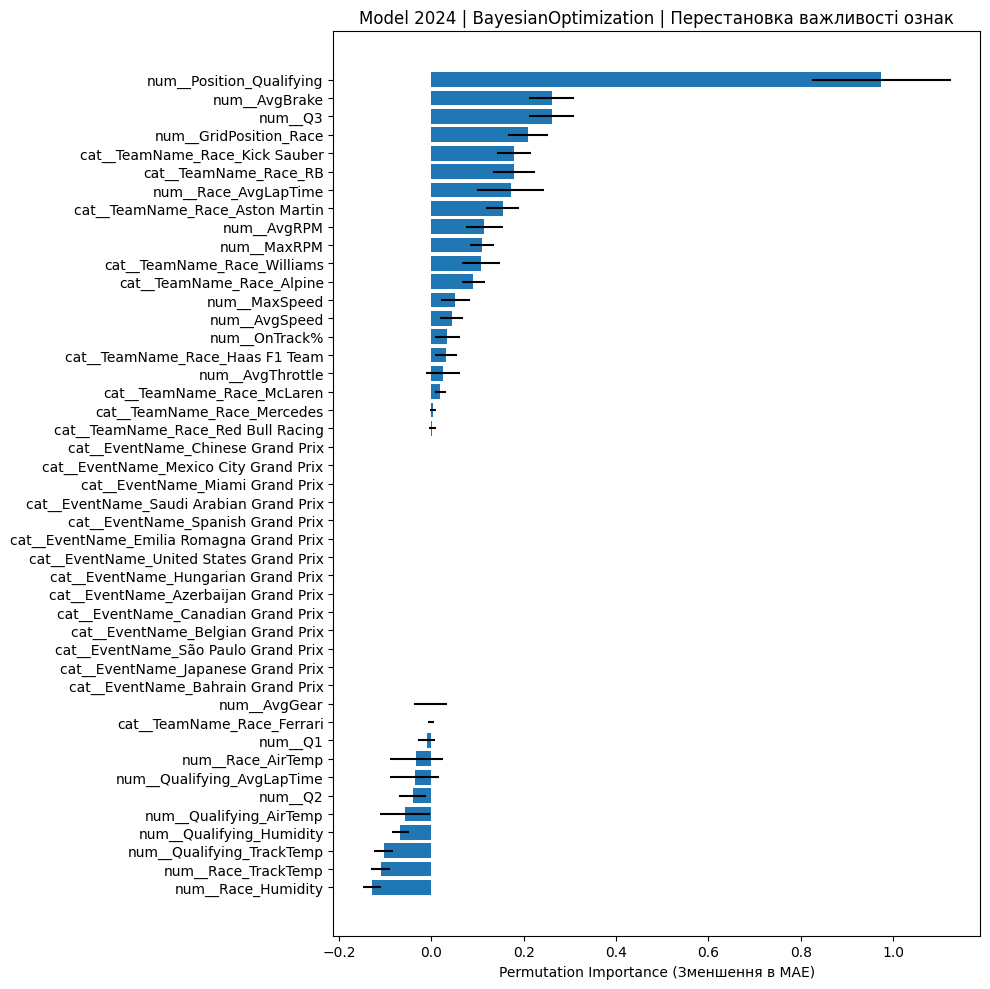

In [24]:
import numpy as np

# Sort the importances
sorted_idx = result.importances_mean.argsort()

plt.figure(figsize=(10, 10))
plt.barh(range(len(sorted_idx)), result.importances_mean[sorted_idx], xerr=result.importances_std[sorted_idx])
plt.yticks(range(len(sorted_idx)), np.array(feature_names)[sorted_idx])
plt.xlabel('Permutation Importance (Зменшення в MAE)')
plt.title(f'Model 2024 | RandomSearch | Перестановка важливості ознак')
plt.tight_layout()
plt.show()


sorted_idx_bayes = result_bayes.importances_mean.argsort()

plt.figure(figsize=(10, 10))
plt.barh(range(len(sorted_idx_bayes)), result_bayes.importances_mean[sorted_idx_bayes], xerr=result_bayes.importances_std[sorted_idx_bayes])
plt.yticks(range(len(sorted_idx_bayes)), np.array(feature_names)[sorted_idx_bayes])
plt.xlabel('Permutation Importance (Зменшення в MAE)')
plt.title(f'Model 2024 | BayesianOptimization | Перестановка важливості ознак')
plt.tight_layout()
plt.show()

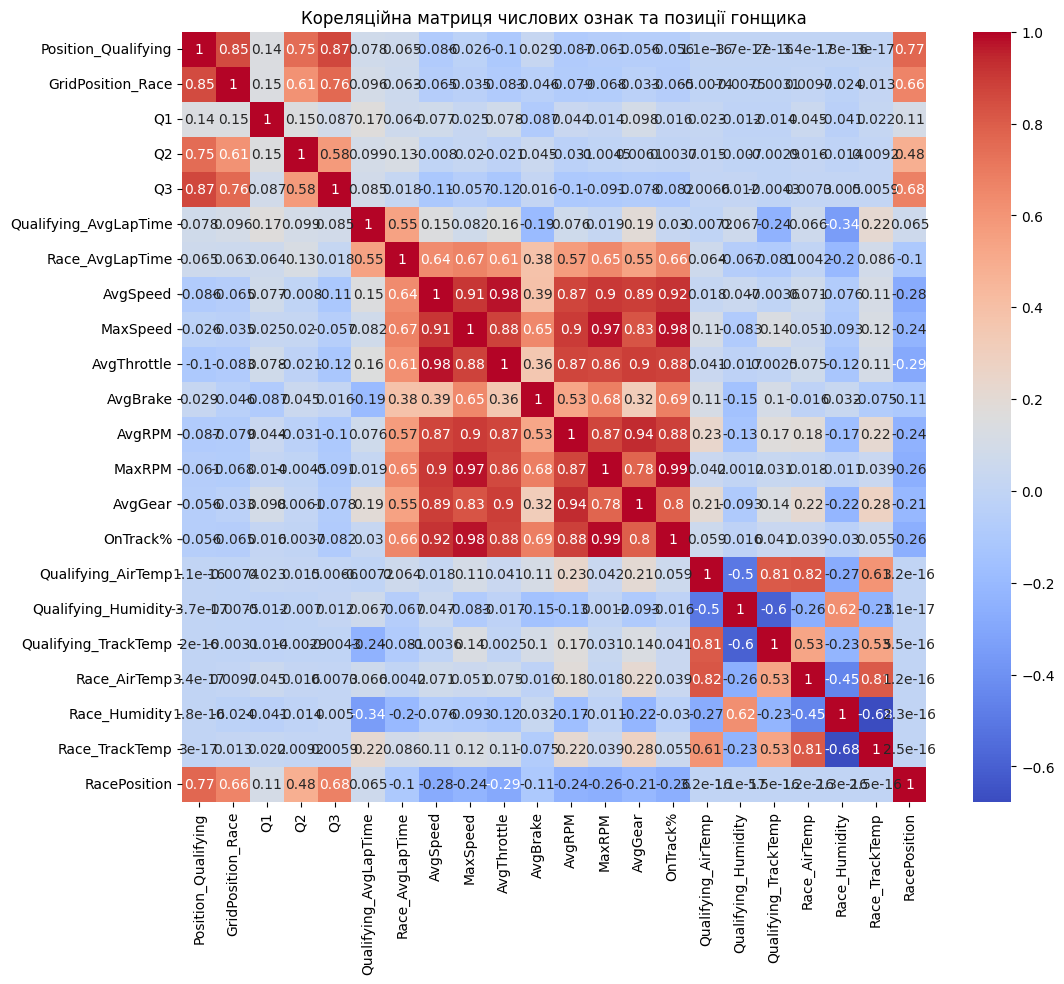

In [25]:
# Get the original features (before preprocessing)
X_original = X_train.reset_index(drop=True)

# Add the target variable
X_original['RacePosition'] = y_train.reset_index(drop=True)

# Select only the numeric columns
numeric_cols = X_original.select_dtypes(include=['float64', 'int64']).columns

# Compute the correlation matrix using only numeric columns
corr_matrix = X_original[numeric_cols].corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Кореляційна матриця числових ознак та позиції гонщика')
plt.show()

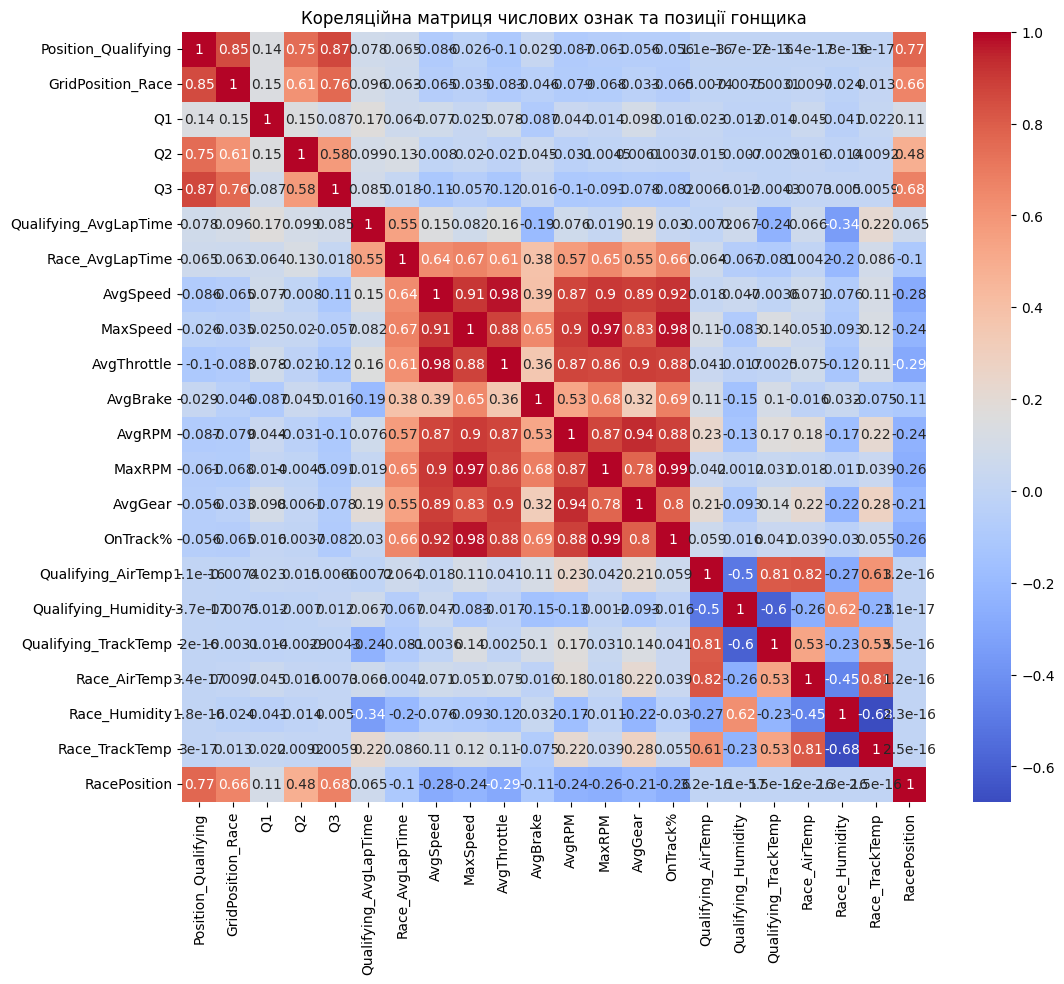

In [26]:
# Perform One-Hot Encoding on categorical columns
X_encoded = pd.get_dummies(X_original, columns=['TeamName_Race'], drop_first=True)

numeric_cols = X_encoded.select_dtypes(include=['float64', 'int64']).columns

# Compute the correlation matrix using only numeric columns
corr_matrix = X_encoded[numeric_cols].corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Кореляційна матриця числових ознак та позиції гонщика')
plt.show()



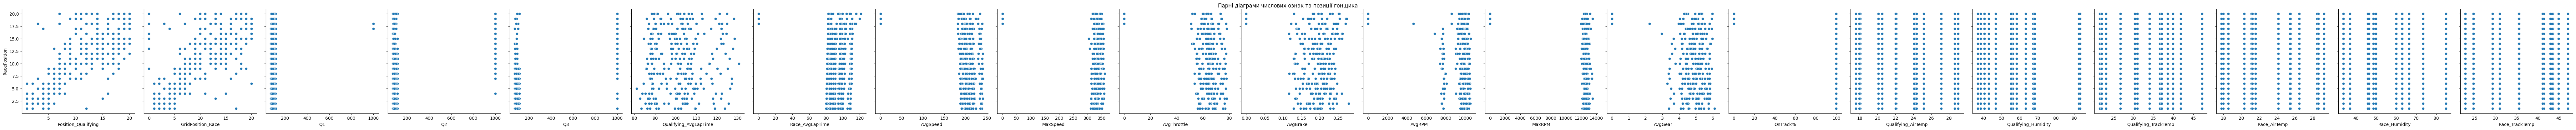

In [27]:
# List of numerical features
numerical_features = numeric_cols.drop('RacePosition')  # Exclude the target variable

# Create pair plots
sns.pairplot(X_original, x_vars=numerical_features, y_vars='RacePosition', height=4, aspect=1)
plt.suptitle('Парні діаграми числових ознак та позиції гонщика', y=1.02)
plt.show()


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 763us/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 720us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 584us/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 643us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 622us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 771us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 594us/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 620us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 655us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 566us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 529us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 618us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 589us/step
1/1 ━━

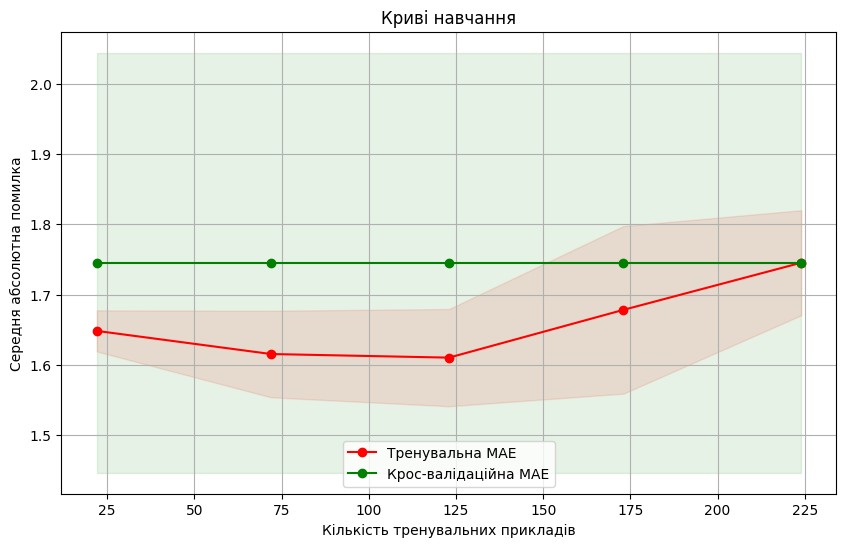

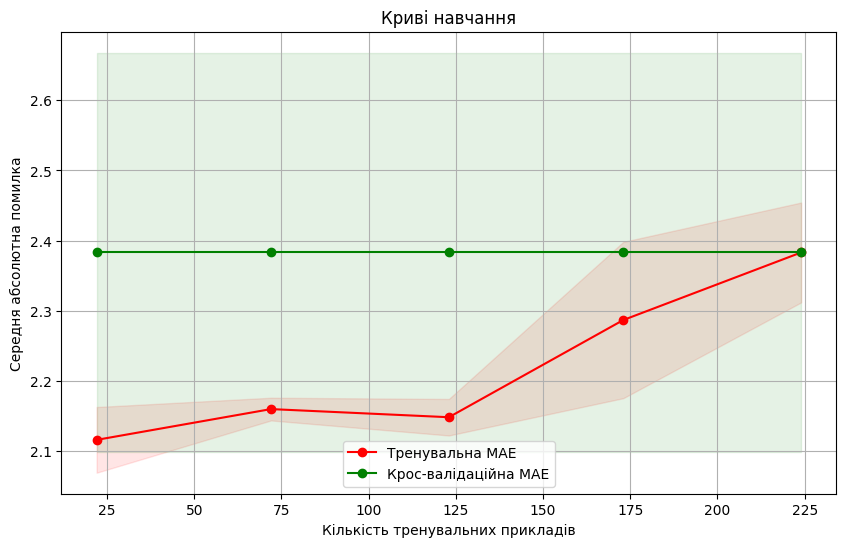

In [28]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    estimator, X_train_processed, y_train, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 5)
)


train_sizes_bayes, train_scores_bayes, test_scores_bayes = learning_curve(
    estimator_bayes, X_train_processed, y_train, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 5)
)


# Calculate mean and standard deviation
train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_mean_bayes = -np.mean(train_scores_bayes, axis=1)

train_scores_std = np.std(train_scores, axis=1)
train_scores_std_bayes = np.std(train_scores_bayes, axis=1)

test_scores_mean = -np.mean(test_scores, axis=1)
test_scores_mean_bayes = -np.mean(test_scores_bayes, axis=1)

test_scores_std = np.std(test_scores, axis=1)
test_scores_std_bayes = np.std(test_scores_bayes, axis=1)

# Plot learning curves
plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Тренувальна MAE")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Крос-валідаційна MAE")
plt.title('Криві навчання')
plt.xlabel('Кількість тренувальних прикладів')
plt.ylabel('Середня абсолютна помилка')
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes_bayes, train_scores_mean_bayes - train_scores_std_bayes,
                 train_scores_mean_bayes + train_scores_std_bayes, alpha=0.1, color="r")
plt.fill_between(train_sizes_bayes, test_scores_mean_bayes - test_scores_std_bayes,
                 test_scores_mean_bayes + test_scores_std_bayes, alpha=0.1, color="g")
plt.plot(train_sizes_bayes, train_scores_mean_bayes, 'o-', color="r", label="Тренувальна MAE")
plt.plot(train_sizes_bayes, test_scores_mean_bayes, 'o-', color="g", label="Крос-валідаційна MAE")
plt.title('Криві навчання')
plt.xlabel('Кількість тренувальних прикладів')
plt.ylabel('Середня абсолютна помилка')
plt.legend()
plt.grid(True)
plt.show()



In [29]:
# Convert y_test and y_pred to DataFrames
y_test_df = y_test.reset_index(drop=True).to_frame(name='ActualRacePosition')
y_test_bayes_df = y_test.reset_index(drop=True).to_frame(name='ActualRacePosition')
y_pred_df = pd.DataFrame(y_pred, columns=['PredictedRacePosition'])
y_pred_bayes_df = pd.DataFrame(y_pred_bayes, columns=['PredictedRacePosition'])


In [30]:
# Get the original test features
X_test_original = X_test.reset_index(drop=True)

# Combine the data
results_df = pd.concat([X_test_original, y_test_df, y_pred_df], axis=1)
results_df_bayes = pd.concat([X_test_original, y_test_bayes_df, y_pred_bayes_df], axis=1)


In [31]:
data_only_2024_reset = data_only_2024.reset_index(drop=True)

results_df = pd.concat([data_only_2024_reset, results_df], axis=1)
results_df_bayes = pd.concat([data_only_2024_reset, results_df_bayes], axis=1)


In [32]:
# Extract the corresponding rows from the full dataset using test indices
test_info = data_only_2024.iloc[test_idx].reset_index(drop=True)
test_info_bayes = data_only_2024.iloc[test_idx].reset_index(drop=True)

# Combine the test info with the results
results_df = pd.concat(
    [test_info[['DriverNumber', 'Abbreviation_Race', 'EventName']].reset_index(drop=True),
     y_test.reset_index(drop=True).to_frame(name='ActualRacePosition'),
     pd.DataFrame(y_pred, columns=['PredictedRacePosition']).reset_index(drop=True)],
    axis=1
)

results_df_bayes = pd.concat(
    [test_info_bayes[['DriverNumber', 'Abbreviation_Race', 'EventName']].reset_index(drop=True),
     y_test.reset_index(drop=True).to_frame(name='ActualRacePosition'),
     pd.DataFrame(y_pred_bayes, columns=['PredictedRacePosition']).reset_index(drop=True)],
    axis=1
)


In [33]:
# Remove duplicate columns if any
results_df = results_df.loc[:, ~results_df.columns.duplicated()]
results_df_bayes = results_df_bayes.loc[:, ~results_df_bayes.columns.duplicated()]


In [34]:
# Sort the results by EventName and ActualRacePosition
results_df.sort_values(['EventName'], inplace=True)
results_df_bayes.sort_values(['EventName'], inplace=True)

# Display the table
print(results_df.to_string(index=False))
print(results_df_bayes.to_string(index=False))


 DriverNumber Abbreviation_Race             EventName  ActualRacePosition  PredictedRacePosition
            1               VER Australian Grand Prix                19.0               2.298557
            3               RIC Australian Grand Prix                12.0              12.145844
           10               GAS Australian Grand Prix                13.0              13.050978
           27               HUL Australian Grand Prix                 9.0              11.354298
           31               OCO Australian Grand Prix                16.0              10.906326
           20               MAG Australian Grand Prix                10.0               8.962064
           77               BOT Australian Grand Prix                14.0              10.361585
           23               ALB Australian Grand Prix                11.0               9.861766
           44               HAM Australian Grand Prix                18.0               6.194092
           24               ZH

/var/folders/3r/y8q1_zkx3l333fyh9s34n0180000gn/T/ipykernel_79230/2671692964.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_data.sort_values('ActualRacePosition', inplace=True)
/var/folders/3r/y8q1_zkx3l333fyh9s34n0180000gn/T/ipykernel_79230/2671692964.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_data_bayes.sort_values('ActualRacePosition', inplace=True)


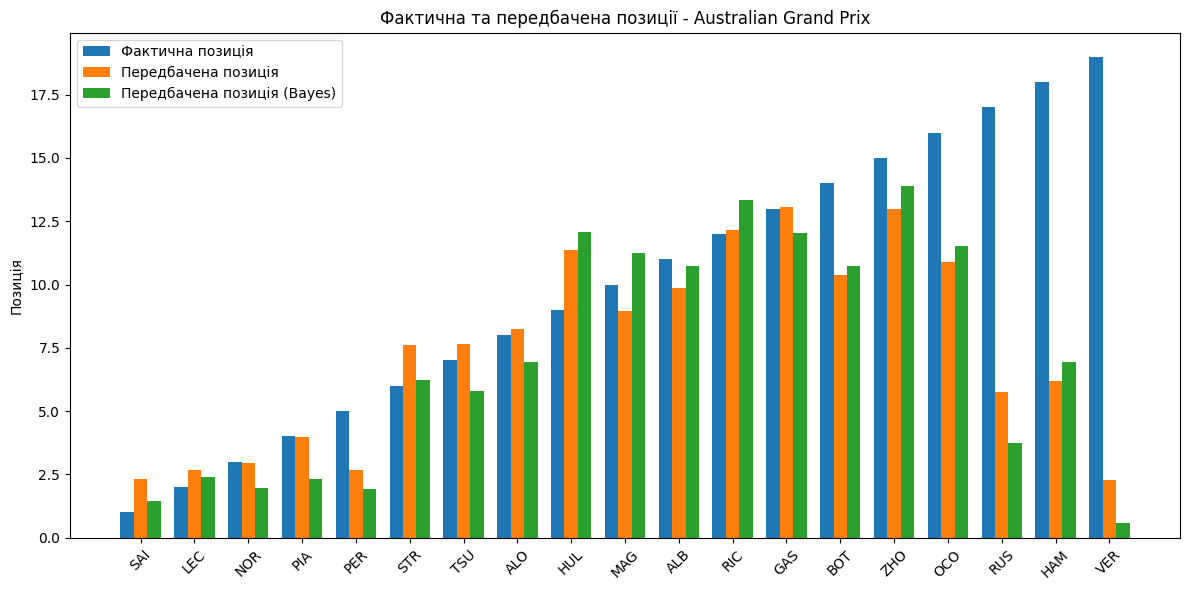

/var/folders/3r/y8q1_zkx3l333fyh9s34n0180000gn/T/ipykernel_79230/2671692964.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_data.sort_values('ActualRacePosition', inplace=True)
/var/folders/3r/y8q1_zkx3l333fyh9s34n0180000gn/T/ipykernel_79230/2671692964.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_data_bayes.sort_values('ActualRacePosition', inplace=True)


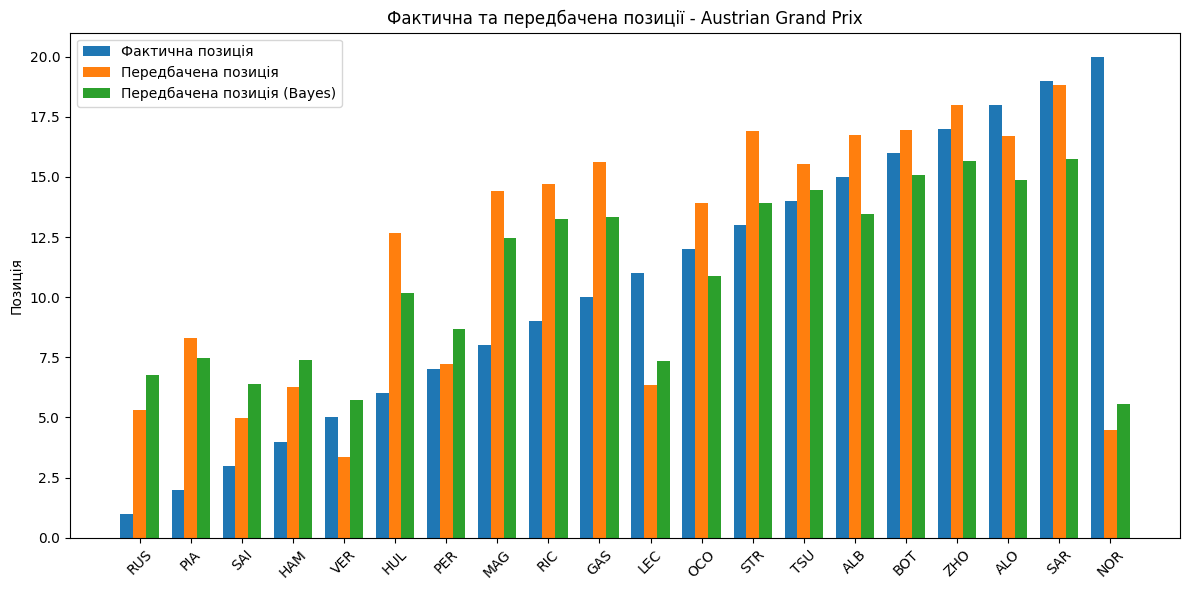

/var/folders/3r/y8q1_zkx3l333fyh9s34n0180000gn/T/ipykernel_79230/2671692964.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_data.sort_values('ActualRacePosition', inplace=True)
/var/folders/3r/y8q1_zkx3l333fyh9s34n0180000gn/T/ipykernel_79230/2671692964.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_data_bayes.sort_values('ActualRacePosition', inplace=True)


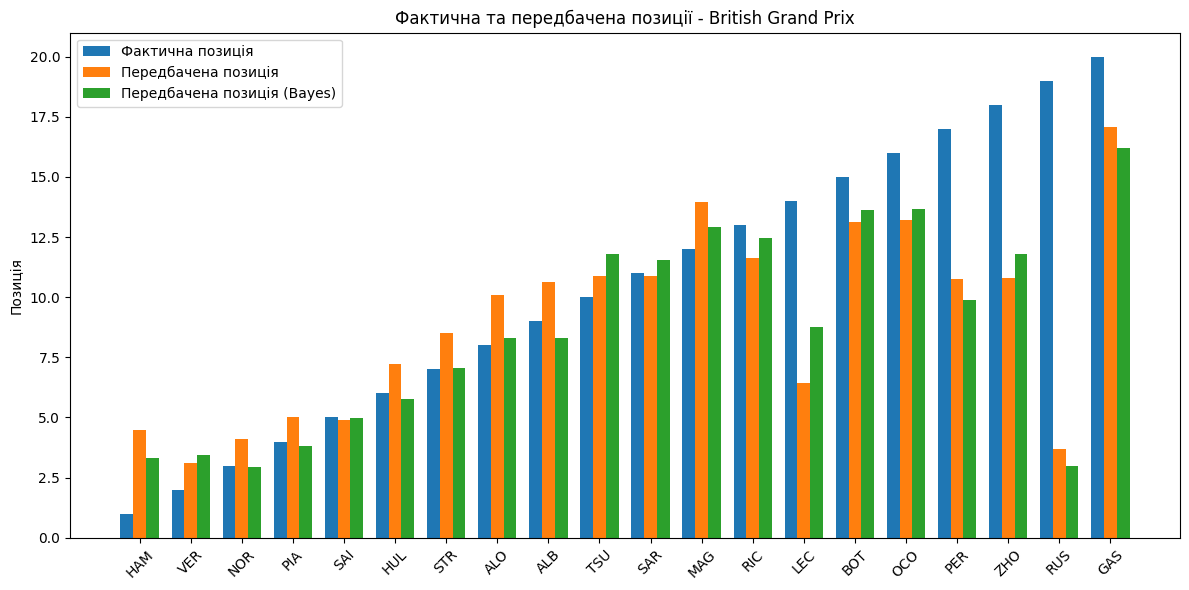

/var/folders/3r/y8q1_zkx3l333fyh9s34n0180000gn/T/ipykernel_79230/2671692964.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_data.sort_values('ActualRacePosition', inplace=True)
/var/folders/3r/y8q1_zkx3l333fyh9s34n0180000gn/T/ipykernel_79230/2671692964.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_data_bayes.sort_values('ActualRacePosition', inplace=True)


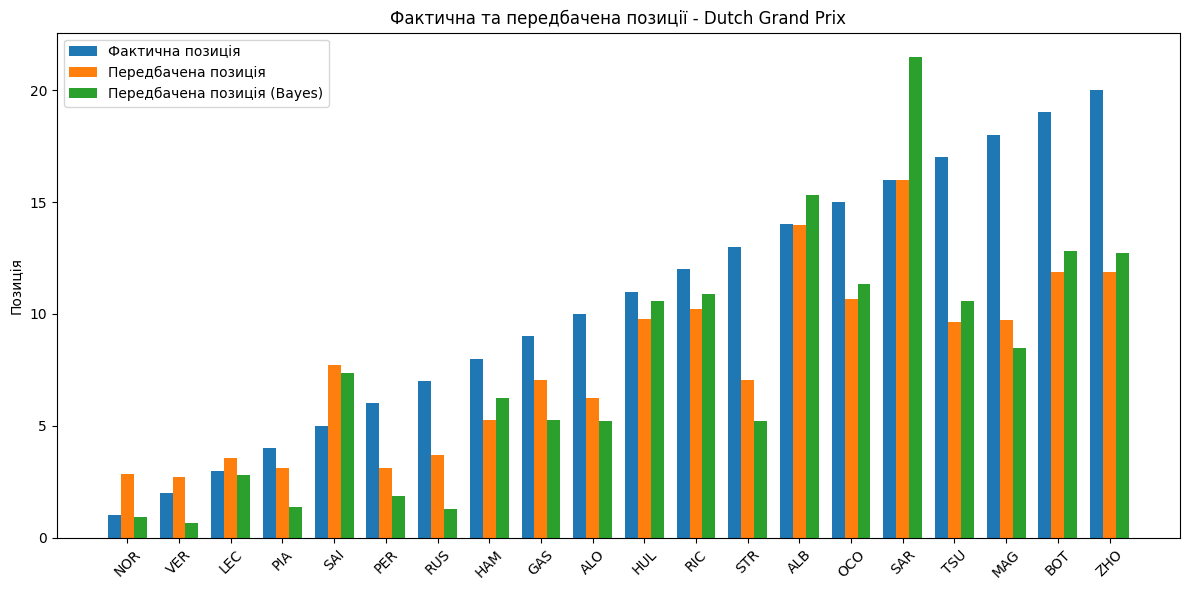

/var/folders/3r/y8q1_zkx3l333fyh9s34n0180000gn/T/ipykernel_79230/2671692964.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_data.sort_values('ActualRacePosition', inplace=True)
/var/folders/3r/y8q1_zkx3l333fyh9s34n0180000gn/T/ipykernel_79230/2671692964.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_data_bayes.sort_values('ActualRacePosition', inplace=True)


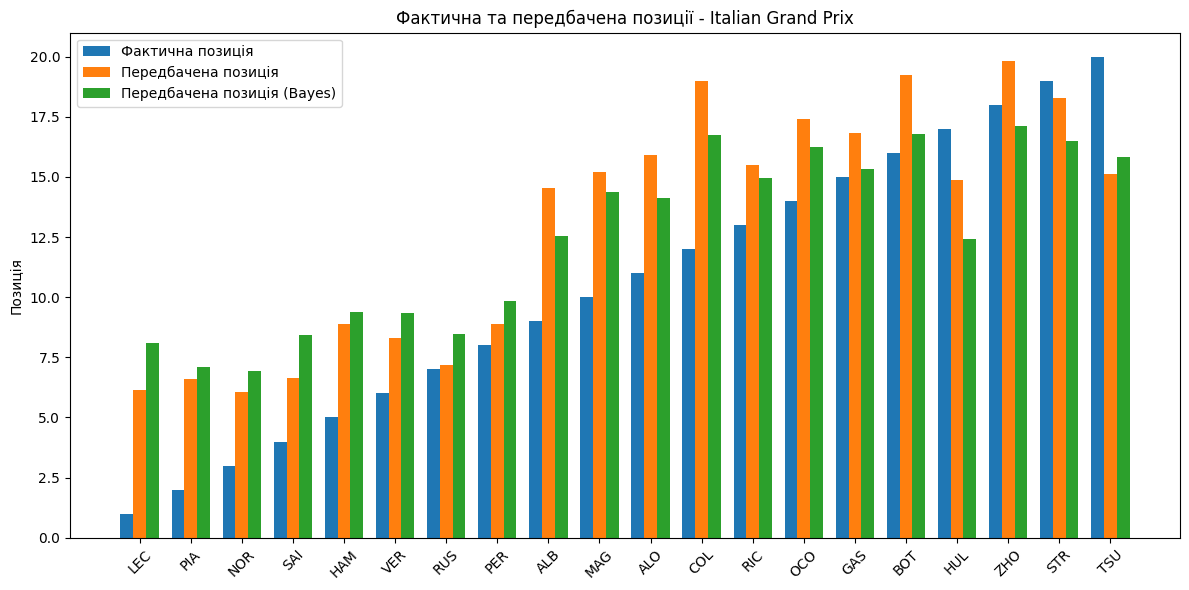

/var/folders/3r/y8q1_zkx3l333fyh9s34n0180000gn/T/ipykernel_79230/2671692964.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_data.sort_values('ActualRacePosition', inplace=True)
/var/folders/3r/y8q1_zkx3l333fyh9s34n0180000gn/T/ipykernel_79230/2671692964.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_data_bayes.sort_values('ActualRacePosition', inplace=True)


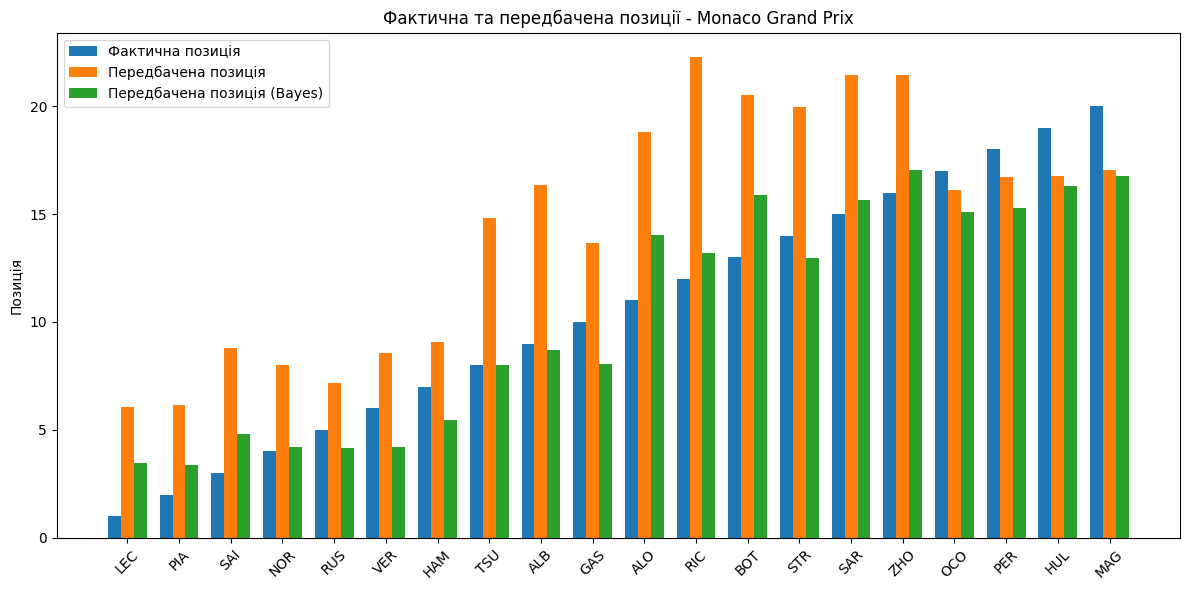

/var/folders/3r/y8q1_zkx3l333fyh9s34n0180000gn/T/ipykernel_79230/2671692964.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_data.sort_values('ActualRacePosition', inplace=True)
/var/folders/3r/y8q1_zkx3l333fyh9s34n0180000gn/T/ipykernel_79230/2671692964.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_data_bayes.sort_values('ActualRacePosition', inplace=True)


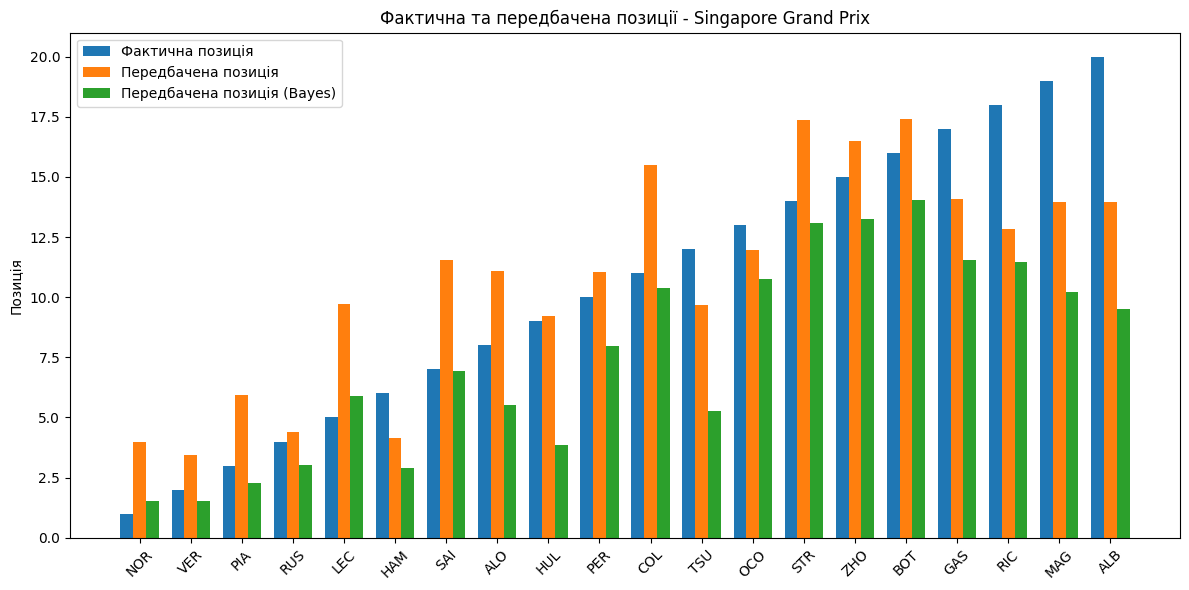

In [36]:
# Get the list of unique events in the test set
events = results_df['EventName'].unique()

for event in events:
    # Filter data for the current event
    event_data = results_df[results_df['EventName'] == event]
    event_data_bayes = results_df_bayes[results_df_bayes['EventName'] == event]

    # Sort by actual race position
    event_data.sort_values('ActualRacePosition', inplace=True)
    event_data_bayes.sort_values('ActualRacePosition', inplace=True)

    # Create a bar plot
    x = np.arange(len(event_data))  # Driver indices
    width = 0.25  # Adjusted width of the bars

    fig, ax = plt.subplots(figsize=(12, 6))
    rects1 = ax.bar(x - width, event_data['ActualRacePosition'], width, label='Фактична позиція')  # Shifted left
    rects2 = ax.bar(x, event_data['PredictedRacePosition'], width, label='Передбачена позиція')  # Centered
    rects3 = ax.bar(x + width, event_data_bayes['PredictedRacePosition'], width, label='Передбачена позиція (Bayes)')  # Shifted right

    # Add labels and titles
    ax.set_ylabel('Позиція')
    ax.set_title(f'Фактична та передбачена позиції - {event}')
    ax.set_xticks(x)
    ax.set_xticklabels(event_data['Abbreviation_Race'], rotation=45)
    ax.legend()

    plt.tight_layout()
    plt.show()


# Версія 2

Implementing Quantile Regression in Keras

What is Quantile Regression?

Quantile regression allows us to predict a specified quantile (e.g., 25th percentile) of the target variable, providing insights into the distribution beyond the mean. By predicting multiple quantiles, we can establish a range within which the target variable is likely to fall.

Steps to Implement Quantile Regression

Define Custom Quantile Loss Functions:

For each quantile 
𝑞
q, the quantile loss (also known as pinball loss) is defined as:
𝐿
𝑞
(
𝑦
,
𝑦
^
)
=
{
𝑞
(
𝑦
−
𝑦
^
)
if 
𝑦
≥
𝑦
^
(
𝑞
−
1
)
(
𝑦
−
𝑦
^
)
if 
𝑦
<
𝑦
^
L 
q
​
 (y, 
y
^
​
 )={ 
q(y− 
y
^
​
 )
(q−1)(y− 
y
^
​
 )
​
  
if y≥ 
y
^
​
 
if y< 
y
^
​
 
​
 
Modify the Model Architecture:

Adjust the output layer to predict multiple quantiles simultaneously (e.g., two
outputs for 25th and 75th percentiles).

Alternatively, train separate models for each quantile.

Train the Model Using Custom Loss Functions:

Use the custom quantile loss functions during model compilation.

Ensure the model learns to predict the specified quantiles accurately.

Evaluate and Validate the Model:

Assess whether the actual race positions fall within the predicted ranges.

Calculate metrics like the proportion of actual positions within the predicted
intervals.

Visualize the Results:

Plot the predicted ranges against the actual positions for each driver.

Highlight instances where predictions are accurate or inaccurate.

In [191]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import joblib

# Define the preprocessing pipelines for numerical and categorical features
numerical_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine pipelines into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features)
    ]
)

# Fit the preprocessor on the training data
preprocessor.fit(X_only_2024)

# Save the preprocessor for later use
joblib.dump(preprocessor, 'preprocessor.joblib')


['preprocessor.joblib']

In [195]:
import torch

def quantile_loss(preds, target, quantile):
    assert 0 < quantile < 1, "Quantile should be in (0, 1) range"
    errors = target - preds
    loss = torch.max(quantile * errors, (quantile - 1) * errors)
    return loss.mean()


In [196]:

from torch.utils.data import DataLoader, TensorDataset

# Convert NumPy arrays to PyTorch tensors
X_train_tensor = torch.tensor(X_train_processed, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)

X_test_tensor = torch.tensor(X_test_processed, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

# Create TensorDatasets
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# Create DataLoaders
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size)


In [197]:
import torch.nn as nn
import torch.nn.functional as F


In [198]:
class QuantileRegressor(nn.Module):
    def __init__(self, input_size, hp):
        super(QuantileRegressor, self).__init__()
        layers = []
        num_layers = hp['num_layers']
        units = [hp[f'units_{i}'] for i in range(num_layers)]
        dropout_rates = [hp[f'dropout_{i}'] for i in range(num_layers)]
        l2_reg = hp['l2']

        last_size = input_size
        for i in range(num_layers):
            layers.append(nn.Linear(last_size, units[i]))
            layers.append(nn.BatchNorm1d(units[i]))  # Add batch normalization
            layers.append(nn.ReLU())
            layers.append(nn.Dropout(dropout_rates[i]))
            last_size = units[i]
        layers.append(nn.Linear(last_size, 2))  # Output layer for two quantiles
        self.model = nn.Sequential(*layers)
        self.l2_reg = l2_reg

    def forward(self, x):
        return self.model(x)


In [199]:
import optuna

def objective(trial):
    # Suggest hyperparameters
    num_layers = trial.suggest_int('num_layers', 1, 4)
    hp = {'num_layers': num_layers}
    for i in range(num_layers):
        hp[f'units_{i}'] = trial.suggest_int(f'units_{i}', 32, 512, step=32)
        hp[f'dropout_{i}'] = trial.suggest_float(f'dropout_{i}', 0.0, 0.5, step=0.1)
    hp['l2'] = trial.suggest_float('l2', 1e-5, 1e-2, log=True)
    learning_rate = trial.suggest_float('learning_rate', 1e-4, 1e-2, log=True)
    quantiles = [0.25, 0.75]

    input_size = X_train_tensor.shape[1]
    model = QuantileRegressor(input_size, hp)

    # Define optimizer with weight decay for L2 regularization
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=hp['l2'])

    # Training loop
    num_epochs = 500
    patience = 20
    best_val_loss = float('inf')
    epochs_no_improve = 0

    for epoch in range(num_epochs):
        model.train()
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            preds = model(X_batch)
            loss_lower = quantile_loss(preds[:, 0], y_batch, quantiles[0])
            loss_upper = quantile_loss(preds[:, 1], y_batch, quantiles[1])
            loss = loss_lower + loss_upper
            loss.backward()
            optimizer.step()

        # Validation
        model.eval()
        val_losses = []
        with torch.no_grad():
            for X_val, y_val in test_loader:
                preds = model(X_val)
                loss_lower = quantile_loss(preds[:, 0], y_val, quantiles[0])
                loss_upper = quantile_loss(preds[:, 1], y_val, quantiles[1])
                val_loss = loss_lower + loss_upper
                val_losses.append(val_loss.item())
        avg_val_loss = np.mean(val_losses)

        # Early stopping
        if avg_val_loss < best_val_loss:
            best_val_loss = avg_val_loss
            epochs_no_improve = 0
        else:
            epochs_no_improve += 1
            if epochs_no_improve >= patience:
                break

    return best_val_loss


In [200]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=500)


[I 2024-11-24 16:39:04,475] A new study created in memory with name: no-name-ca9fec5c-9a79-4754-aeae-2c067157e008
[I 2024-11-24 16:39:05,114] Trial 0 finished with value: 2.5877588748931886 and parameters: {'num_layers': 3, 'units_0': 352, 'dropout_0': 0.30000000000000004, 'units_1': 192, 'dropout_1': 0.1, 'units_2': 512, 'dropout_2': 0.0, 'l2': 0.0006062079848171373, 'learning_rate': 0.0006540797244855231}. Best is trial 0 with value: 2.5877588748931886.
[I 2024-11-24 16:39:05,736] Trial 1 finished with value: 2.4668840646743773 and parameters: {'num_layers': 3, 'units_0': 96, 'dropout_0': 0.2, 'units_1': 352, 'dropout_1': 0.2, 'units_2': 160, 'dropout_2': 0.1, 'l2': 2.612616808071762e-05, 'learning_rate': 0.0030677096900316525}. Best is trial 1 with value: 2.4668840646743773.
[I 2024-11-24 16:39:06,399] Trial 2 finished with value: 2.398523545265198 and parameters: {'num_layers': 2, 'units_0': 384, 'dropout_0': 0.5, 'units_1': 96, 'dropout_1': 0.30000000000000004, 'l2': 0.00053342454

In [201]:
best_trial = study.best_trial
best_hp = best_trial.params
print("Best hyperparameters:")
for key, value in best_hp.items():
    print(f"{key}: {value}")

# Best hyperparameters:
# num_layers: 4
# units_0: 32
# dropout_0: 0.4
# units_1: 320
# dropout_1: 0.1
# units_2: 128
# dropout_2: 0.5
# units_3: 128
# dropout_3: 0.30000000000000004
# l2: 0.0004083320261804285
# learning_rate: 0.007369336365478275


Best hyperparameters:
num_layers: 4
units_0: 32
dropout_0: 0.5
units_1: 288
dropout_1: 0.1
units_2: 128
dropout_2: 0.2
units_3: 32
dropout_3: 0.0
l2: 0.0001510172866723852
learning_rate: 0.001639477981819678


In [202]:
input_size = X_train_tensor.shape[1]
model = QuantileRegressor(input_size, best_hp)
optimizer = torch.optim.Adam(model.parameters(), lr=best_hp['learning_rate'], weight_decay=best_hp['l2'])


In [203]:
num_epochs = 500
patience = 20
best_val_loss = float('inf')
epochs_no_improve = 0
# quantiles = [0.25, 0.75]
quantiles = [0.4, 0.8]
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    model.train()
    epoch_train_loss = 0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        preds = model(X_batch)
        loss_lower = quantile_loss(preds[:, 0], y_batch, quantiles[0])
        loss_upper = quantile_loss(preds[:, 1], y_batch, quantiles[1])
        loss = loss_lower + loss_upper
        loss.backward()
        optimizer.step()
        epoch_train_loss += loss.item() * X_batch.size(0)


    train_loss = epoch_train_loss / len(train_loader.dataset)
    train_losses.append(train_loss)

    # Validation
    model.eval()
    val_losses = []
    with torch.no_grad():
        for X_val, y_val in test_loader:
            preds = model(X_val)
            loss_lower = quantile_loss(preds[:, 0], y_val, quantiles[0])
            loss_upper = quantile_loss(preds[:, 1], y_val, quantiles[1])
            val_loss = loss_lower + loss_upper
            val_losses.append(val_loss.item())
    avg_val_loss = np.mean(val_losses)
    val_losses.append(avg_val_loss)
    print(f"Epoch {epoch+1}, Validation Loss: {avg_val_loss}")

    # Early stopping
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        epochs_no_improve = 0
        # Save the model
        torch.save(model.state_dict(), 'best_model_quantile.pt')
    else:
        epochs_no_improve += 1
        if epochs_no_improve >= patience:
            print("Early stopping")
            break

# Load the best model
model.load_state_dict(torch.load('best_model_quantile.pt'))


Epoch 1, Validation Loss: 13.112701416015625
Epoch 2, Validation Loss: 12.980384635925294
Epoch 3, Validation Loss: 12.731567001342773
Epoch 4, Validation Loss: 12.320103454589844
Epoch 5, Validation Loss: 11.86549129486084
Epoch 6, Validation Loss: 11.54513759613037
Epoch 7, Validation Loss: 11.062278556823731
Epoch 8, Validation Loss: 10.697916984558105
Epoch 9, Validation Loss: 10.199681282043457
Epoch 10, Validation Loss: 9.646329593658447
Epoch 11, Validation Loss: 9.006339359283448
Epoch 12, Validation Loss: 8.65747709274292
Epoch 13, Validation Loss: 8.126590538024903
Epoch 14, Validation Loss: 7.288446140289307
Epoch 15, Validation Loss: 6.806599521636963
Epoch 16, Validation Loss: 5.530256652832032
Epoch 17, Validation Loss: 5.42560338973999
Epoch 18, Validation Loss: 4.978520917892456
Epoch 19, Validation Loss: 4.8039600372314455
Epoch 20, Validation Loss: 4.5215638160705565
Epoch 21, Validation Loss: 3.696788692474365
Epoch 22, Validation Loss: 3.5606131076812746
Epoch 23, V

/var/folders/3r/y8q1_zkx3l333fyh9s34n0180000gn/T/ipykernel_79230/1108811462.py:54: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_model

<All keys matched successfully>

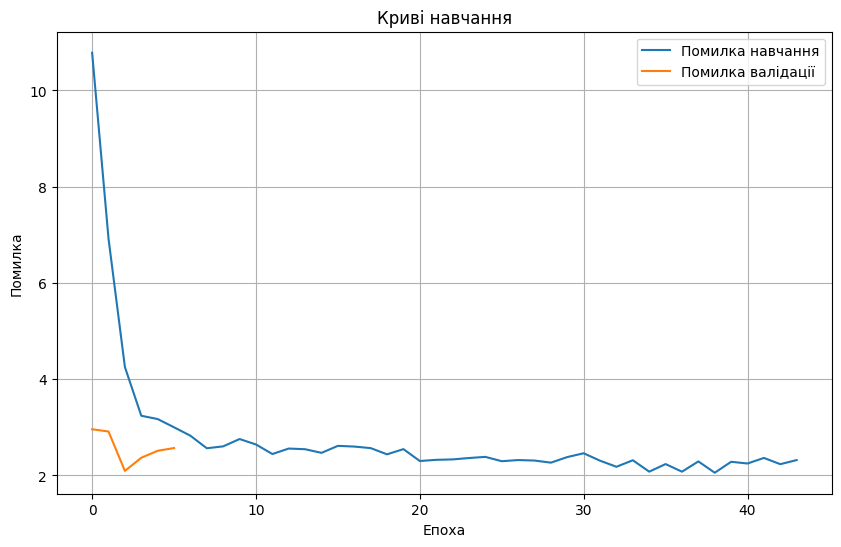

In [185]:
plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Помилка навчання')
plt.plot(val_losses, label='Помилка валідації')
plt.xlabel('Епоха')
plt.ylabel('Помилка')
plt.title('Криві навчання')
plt.legend()
plt.grid(True)
plt.show()


In [156]:
model.eval()
with torch.no_grad():
    preds = model(X_test_tensor)
    y_pred_lower = preds[:, 0].numpy()
    y_pred_upper = preds[:, 1].numpy()

# Ensure lower <= upper
y_pred_lower, y_pred_upper = np.minimum(y_pred_lower, y_pred_upper), np.maximum(y_pred_lower, y_pred_upper)


In [157]:
# Calculate the width of the prediction intervals
prediction_intervals = y_pred_upper - y_pred_lower
average_interval_width = np.mean(prediction_intervals)
print(f"Average prediction interval width: {average_interval_width}")

# Determine the percentage of actual positions within the predicted ranges
y_test_np = y_test_tensor.numpy()
within_range = np.logical_and(y_test_np >= y_pred_lower, y_test_np <= y_pred_upper)
percentage_within_range = np.mean(within_range) * 100
print(f"Percentage of actual positions within predicted range: {percentage_within_range}%")

# Average prediction interval width: 3.5702145099639893
# Percentage of actual positions within predicted range: 44.60431654676259%


Average prediction interval width: 3.5076022148132324
Percentage of actual positions within predicted range: 38.84892086330935%


In [158]:
# Extract test_info from your earlier code
test_info = data_only_2024.iloc[test_idx].reset_index(drop=True)

# Create a DataFrame for plotting
results_df = pd.DataFrame({
    'DriverNumber': test_info['DriverNumber'].values,
    'Abbreviation_Race': test_info['Abbreviation_Race'].values,
    'EventName': test_info['EventName'].values,
    'ActualRacePosition': y_test_np,
    'PredictedLower': y_pred_lower,
    'PredictedUpper': y_pred_upper
})


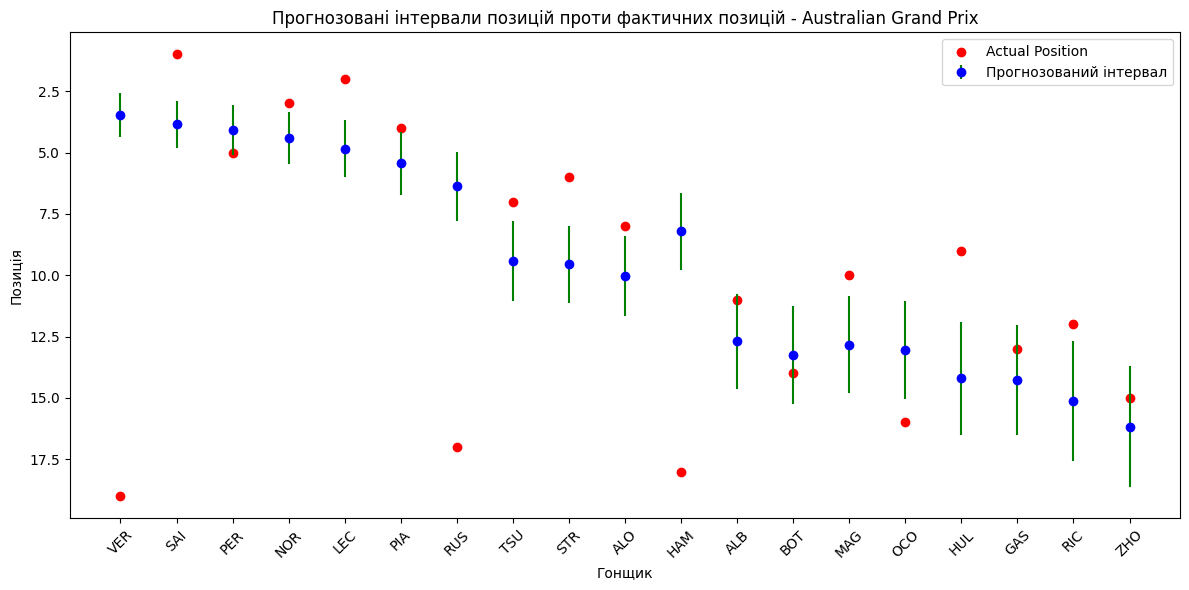

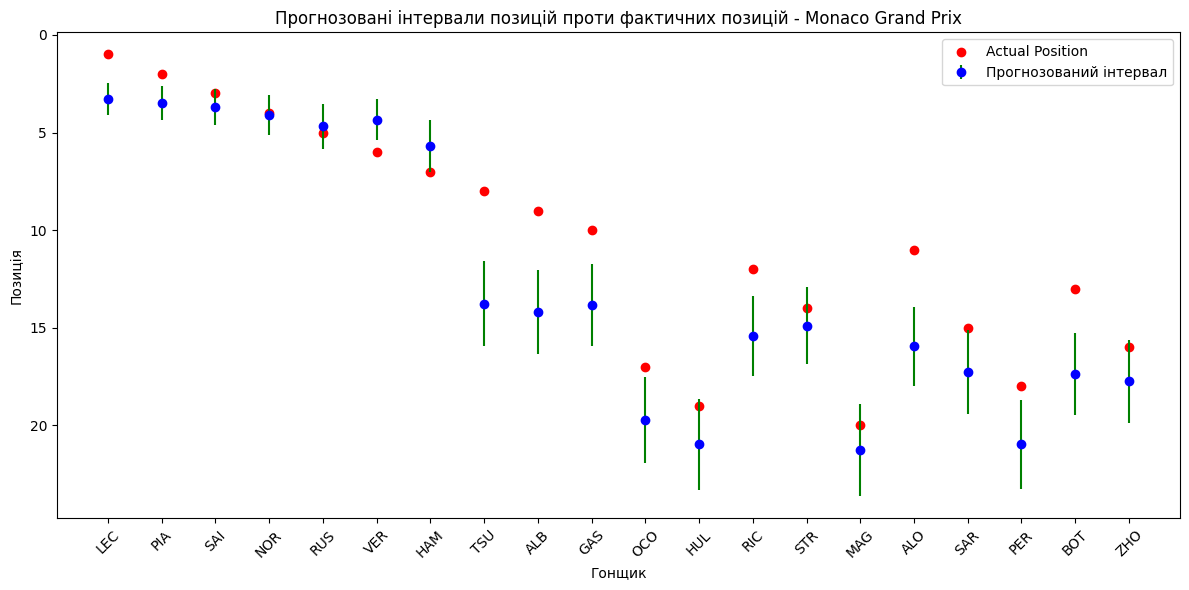

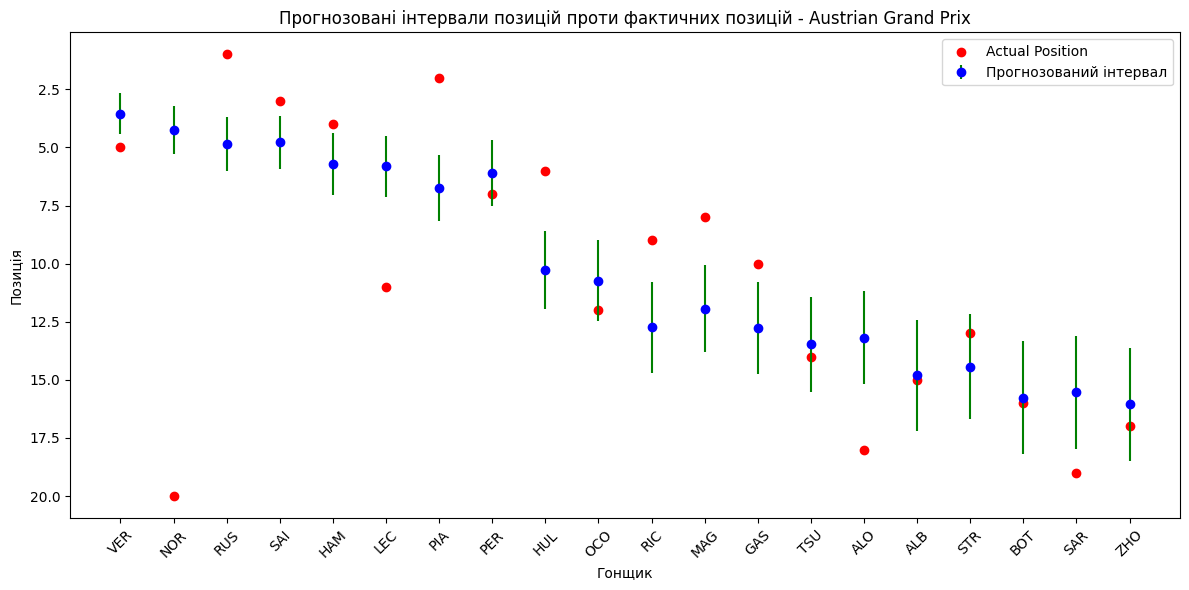

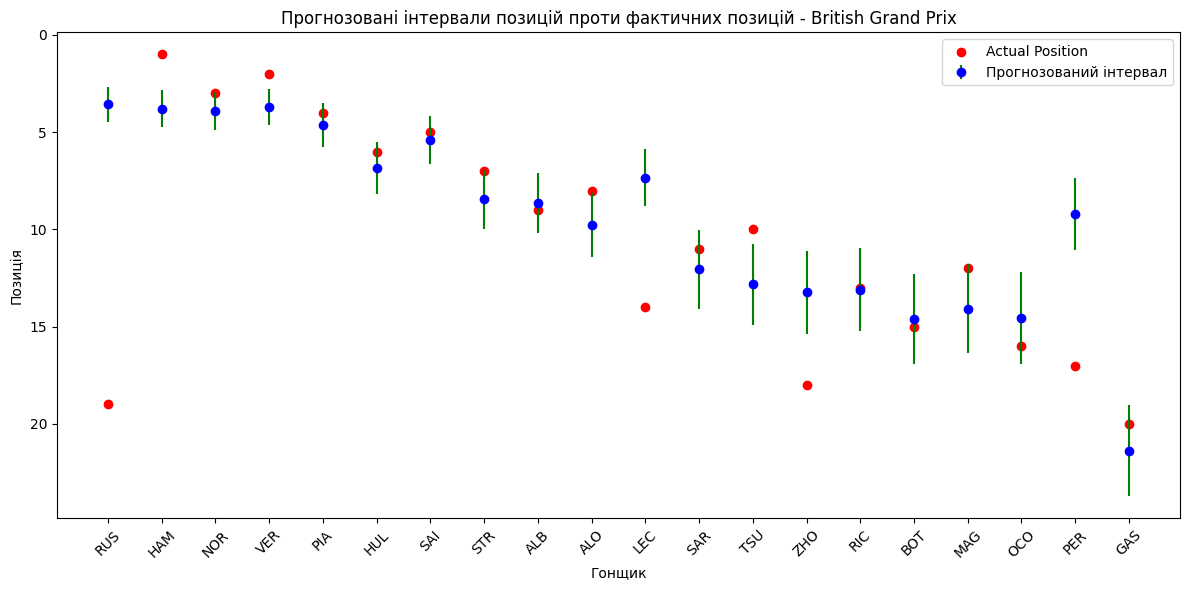

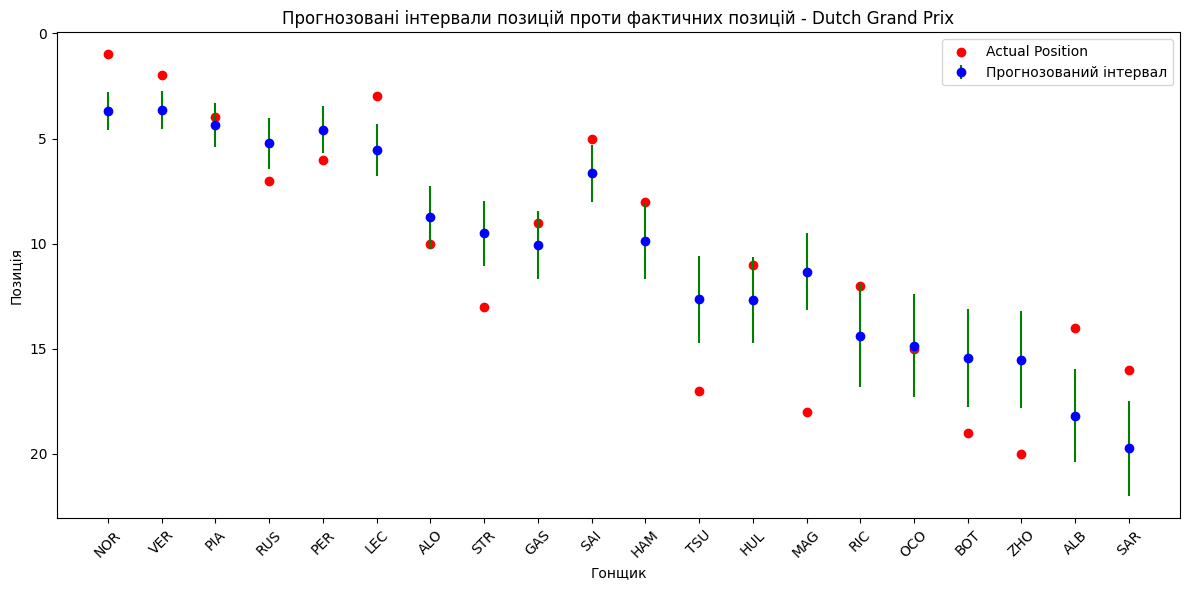

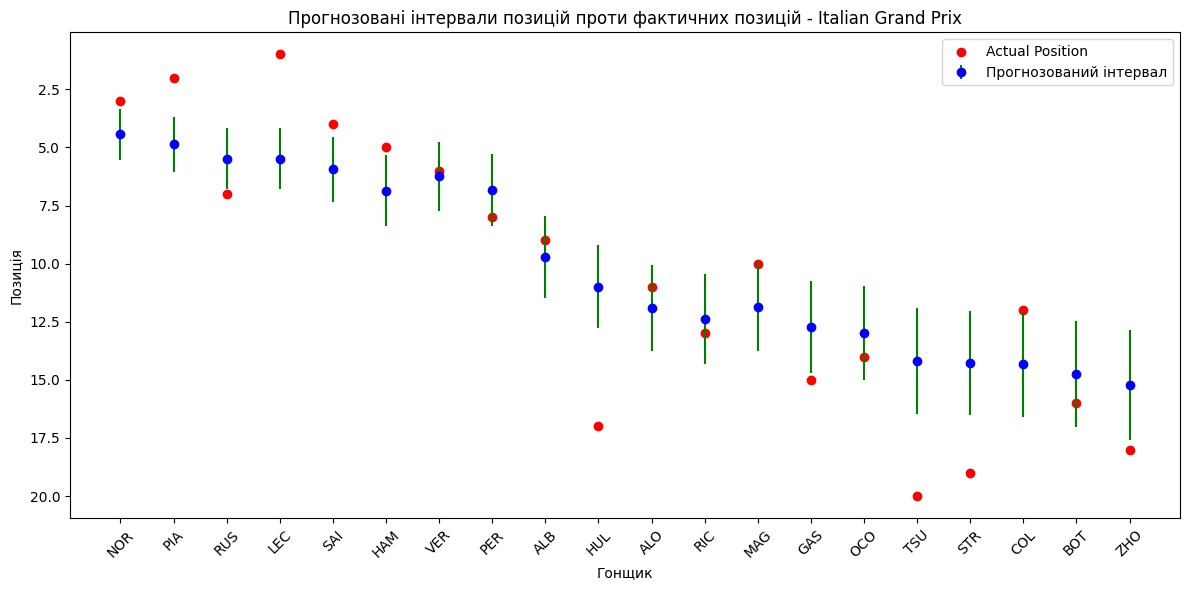

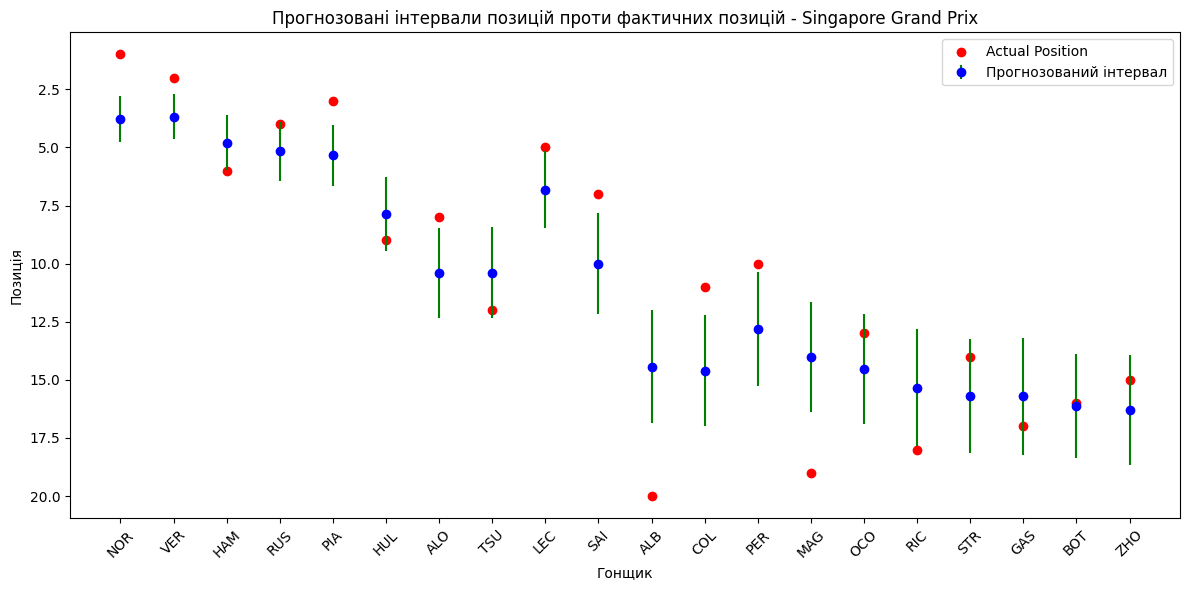

In [186]:
import matplotlib.pyplot as plt
import numpy as np

events = results_df['EventName'].unique()

for event in events:
    event_data = results_df[results_df['EventName'] == event]

    # Compute the midpoints of the predicted intervals
    predicted_midpoints = (event_data['PredictedLower'] + event_data['PredictedUpper']) / 2
    predicted_errors = [
        predicted_midpoints - event_data['PredictedLower'],  # Lower errors
        event_data['PredictedUpper'] - predicted_midpoints   # Upper errors
    ]

    plt.figure(figsize=(12, 6))

    # Plot predicted intervals as error bars around the predicted midpoints
    plt.errorbar(
        event_data['Abbreviation_Race'], predicted_midpoints,
        yerr=predicted_errors,
        fmt='o', ecolor='g', capthick=2, label='Прогнозований інтервал', color='b'
    )

    # Plot actual positions
    plt.scatter(event_data['Abbreviation_Race'], event_data['ActualRacePosition'], color='r', label='Actual Position')

    plt.xlabel('Гонщик')
    plt.ylabel('Позиція')
    plt.title(f'Прогнозовані інтервали позицій проти фактичних позицій - {event}')
    plt.legend()
    plt.gca().invert_yaxis()  # Нижчі позиції краще
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


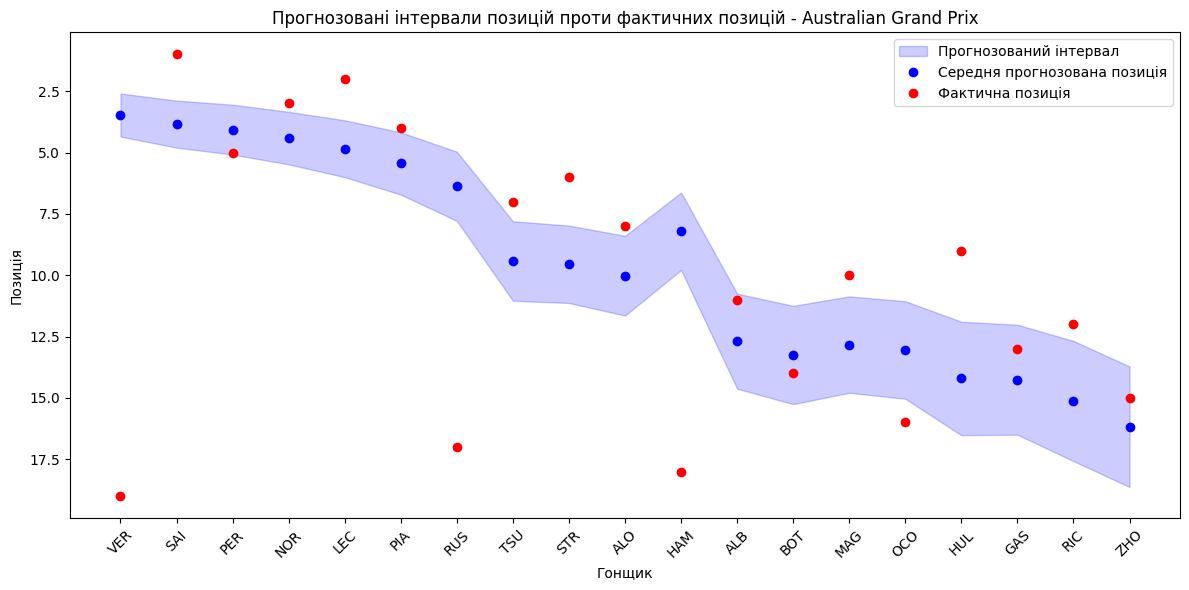

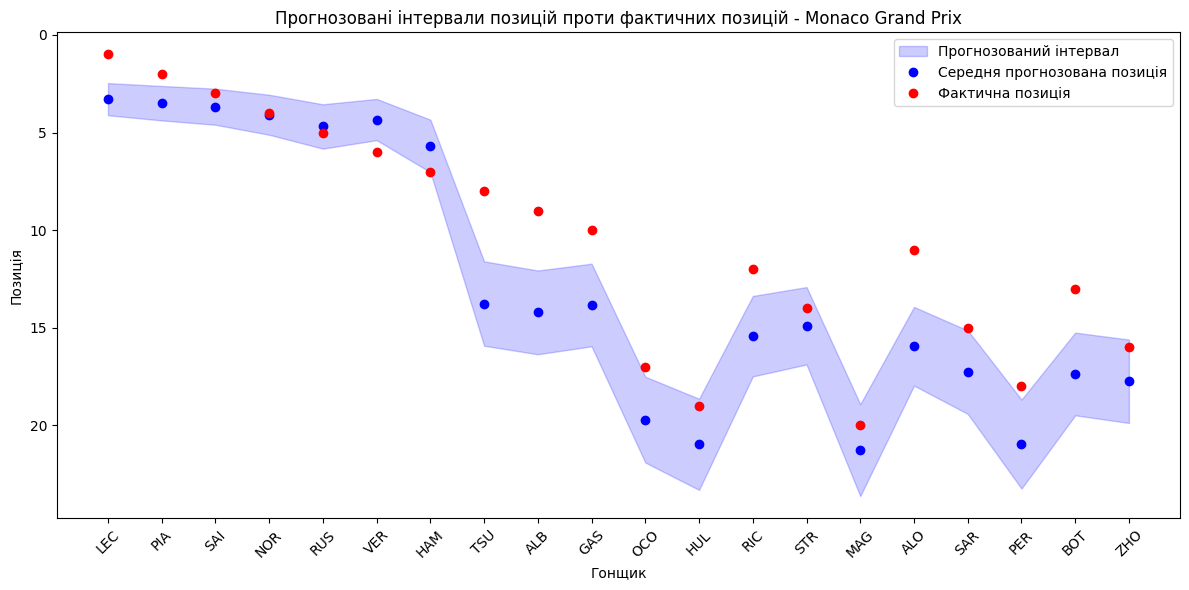

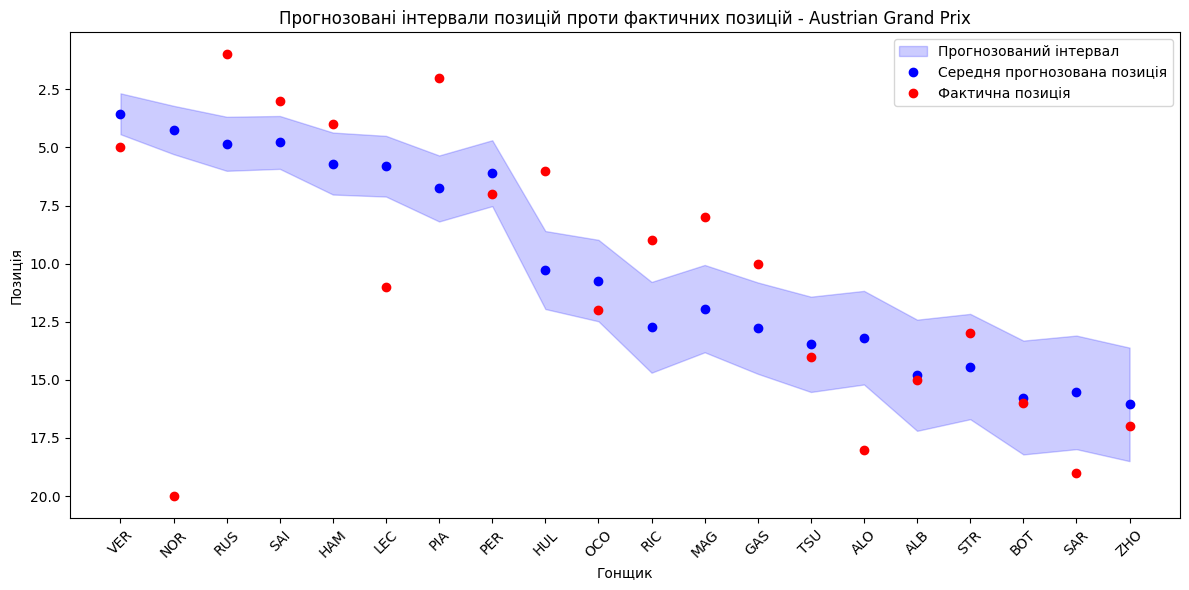

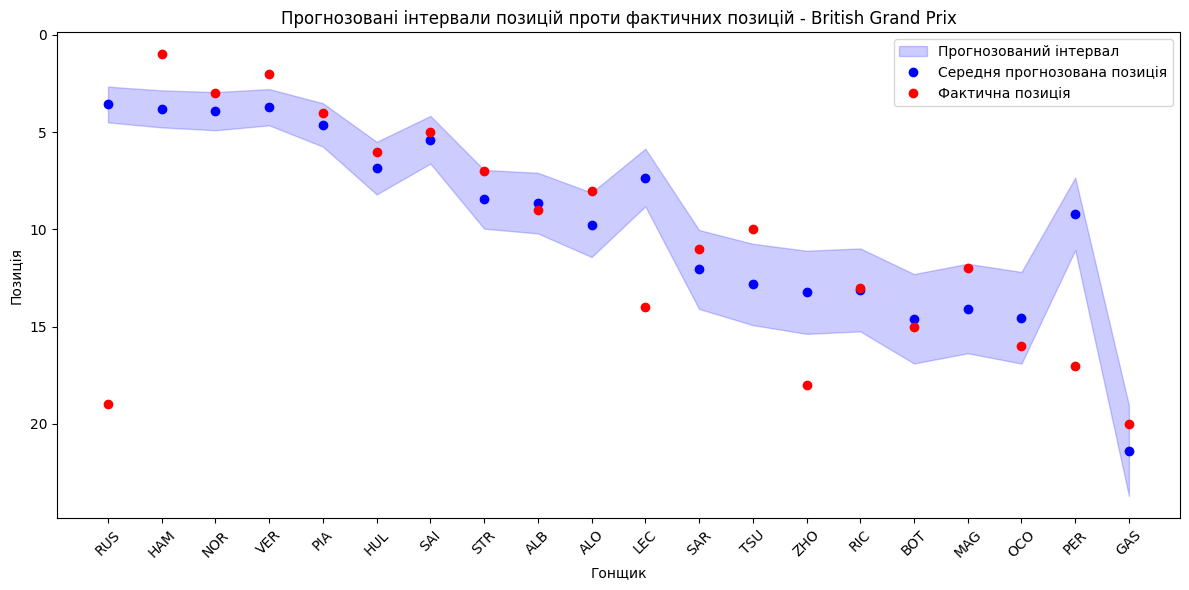

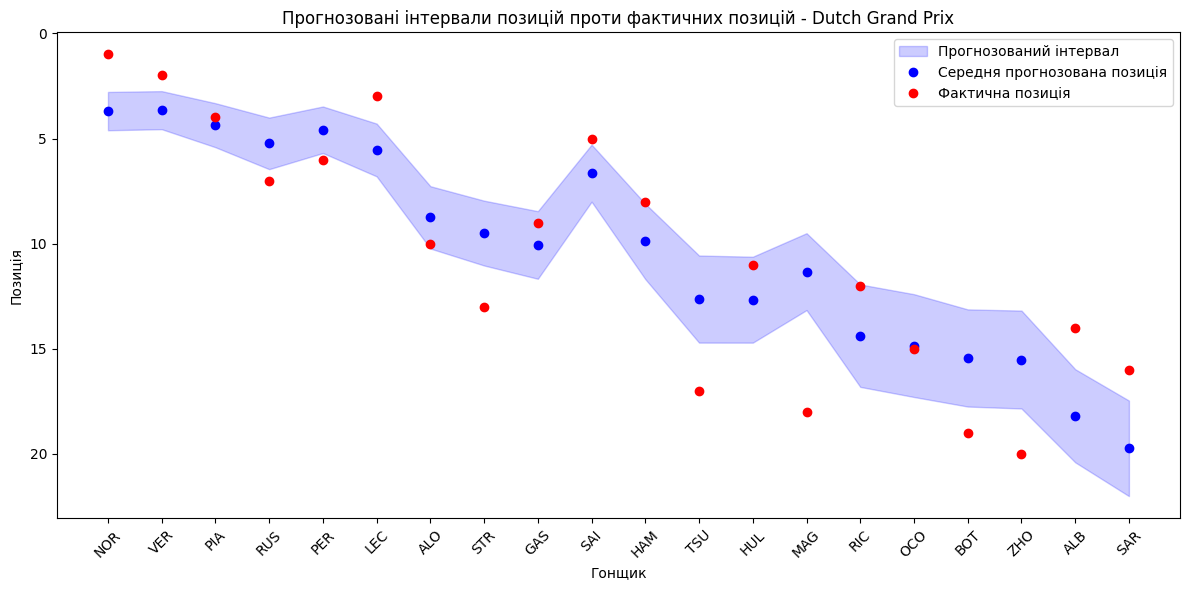

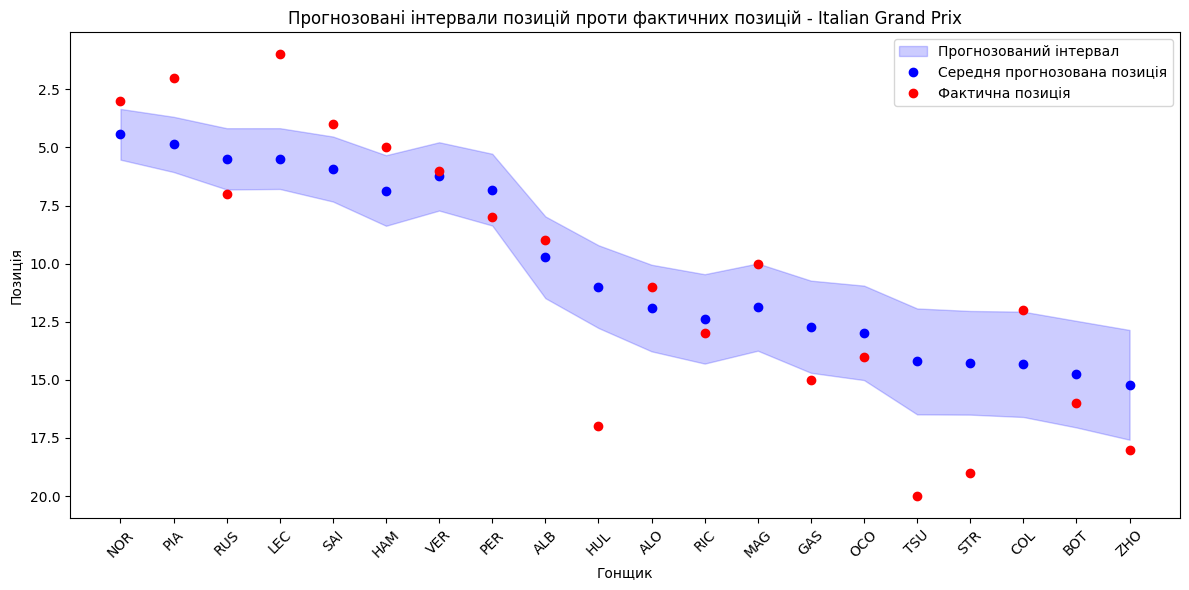

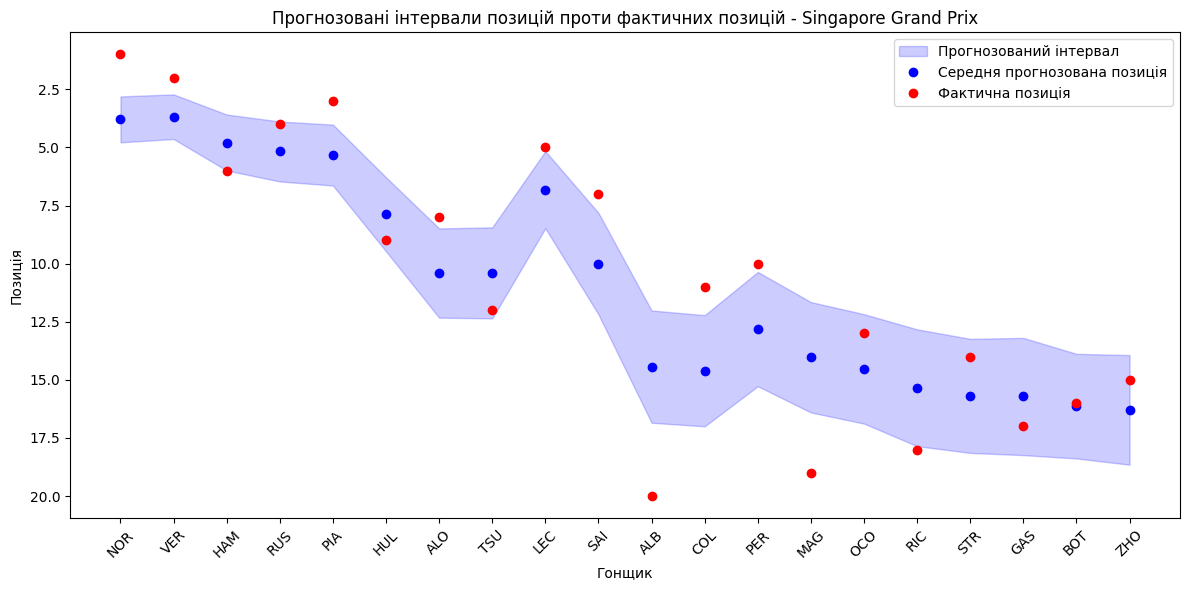

In [187]:
import matplotlib.pyplot as plt

events = results_df['EventName'].unique()

for event in events:
    event_data = results_df[results_df['EventName'] == event]
    drivers = event_data['Abbreviation_Race']
    x = np.arange(len(drivers))

    plt.figure(figsize=(12, 6))

    # Plot the prediction intervals as shaded areas
    plt.fill_between(
        x, event_data['PredictedLower'], event_data['PredictedUpper'],
        color='blue', alpha=0.2, label='Прогнозований інтервал'
    )

    # Plot predicted midpoints
    predicted_midpoints = (event_data['PredictedLower'] + event_data['PredictedUpper']) / 2
    plt.plot(x, predicted_midpoints, 'bo', label='Середня прогнозована позиція')

    # Plot actual positions
    plt.plot(x, event_data['ActualRacePosition'], 'ro', label='Фактична позиція')

    plt.xlabel('Гонщик')
    plt.ylabel('Позиція')
    plt.title(f'Прогнозовані інтервали позицій проти фактичних позицій - {event}')
    plt.legend()
    plt.gca().invert_yaxis()
    plt.xticks(x, drivers, rotation=45)
    plt.tight_layout()
    plt.show()


In [161]:
# Identify good predictions
good_interval_width = prediction_intervals <= 5
good_prediction = np.logical_and(within_range, good_interval_width)

# Calculate percentages
percentage_good_predictions = np.mean(good_prediction) * 100
print(f"Percentage of good predictions: {percentage_good_predictions}%")


Percentage of good predictions: 38.1294964028777%


Average prediction interval width: 3.5702145099639893

Percentage of actual positions within predicted range: 44.60431654676259%

Percentage of Good Predictions: Approximately 41.73%.


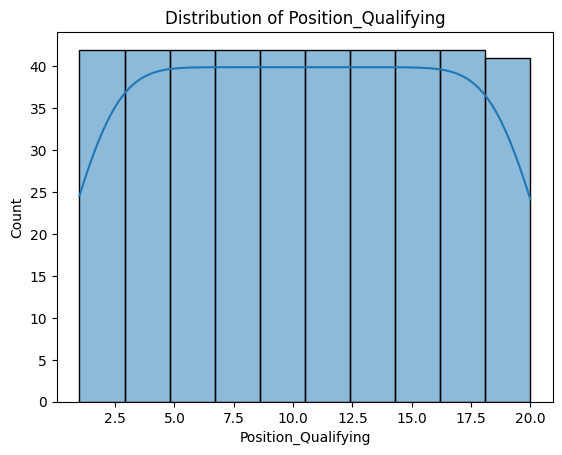

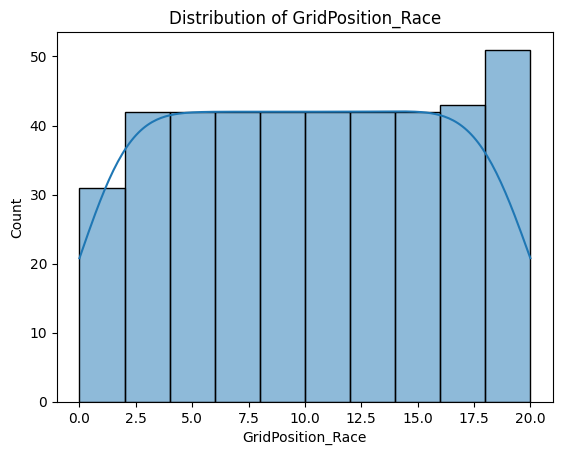

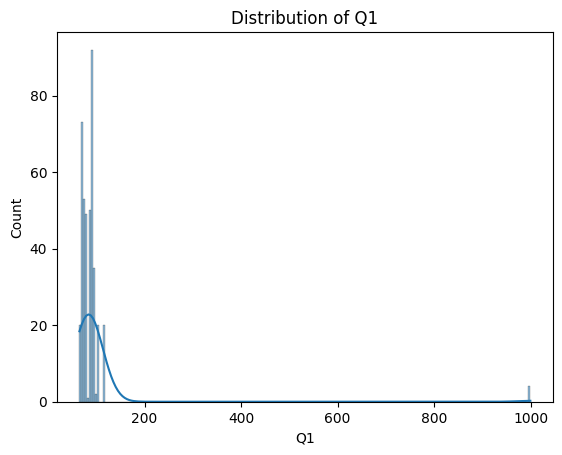

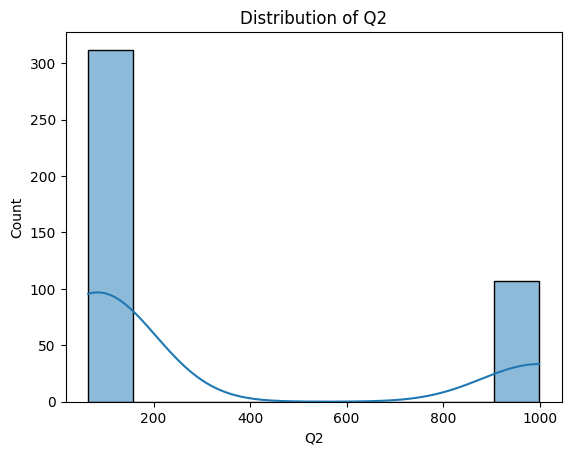

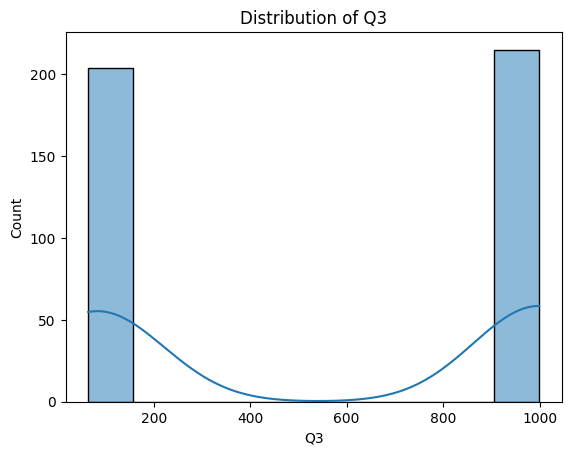

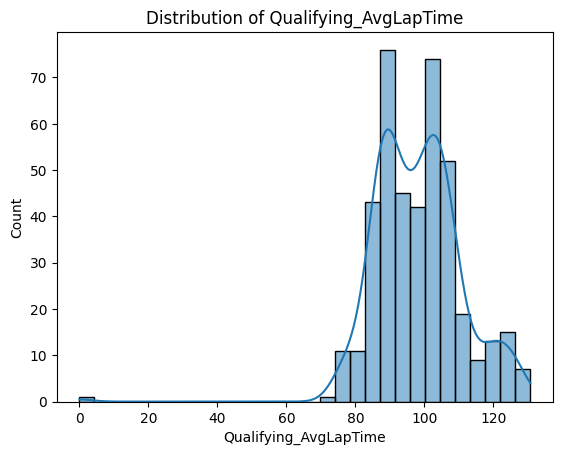

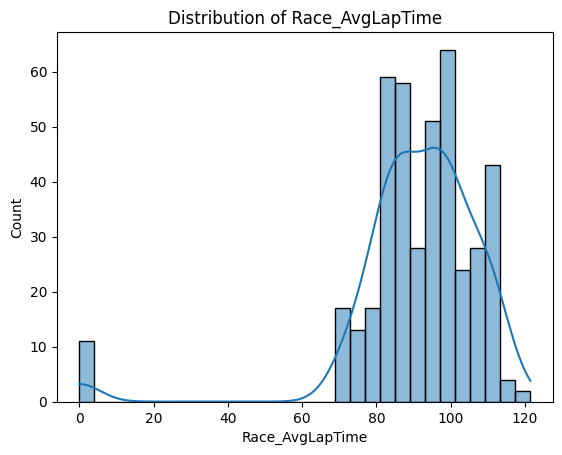

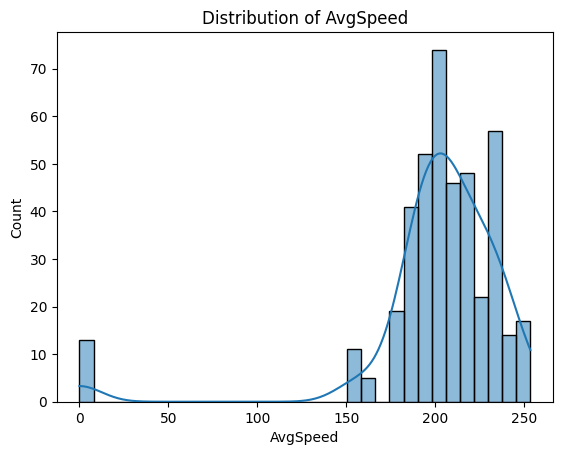

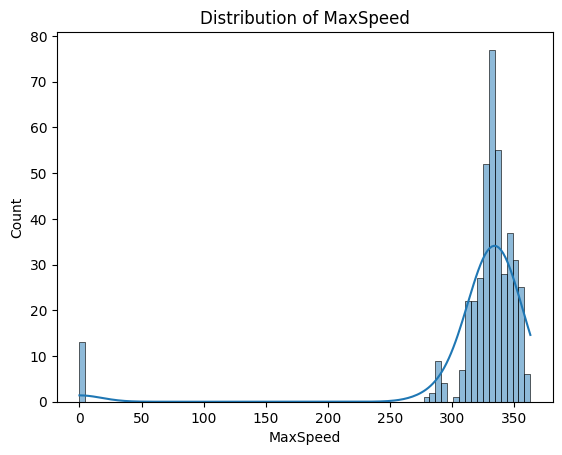

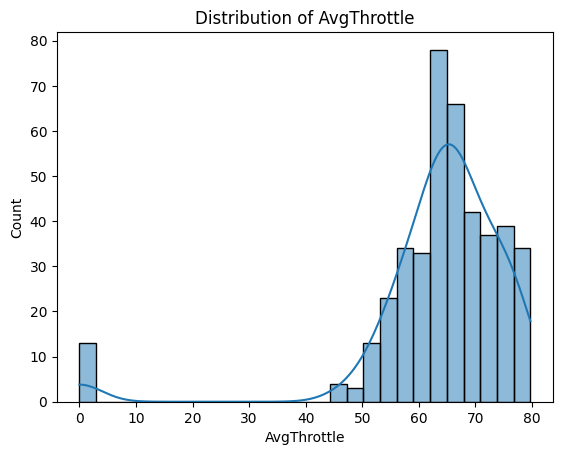

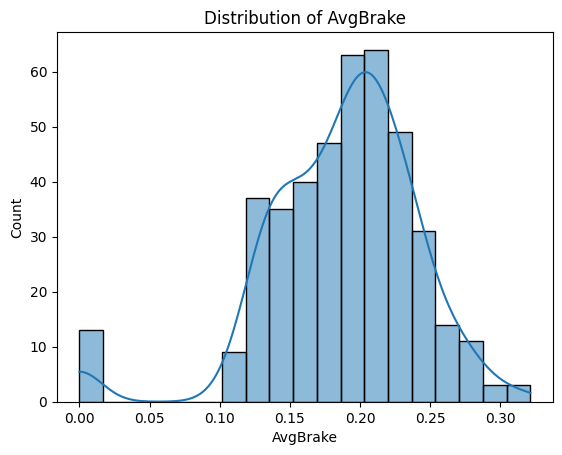

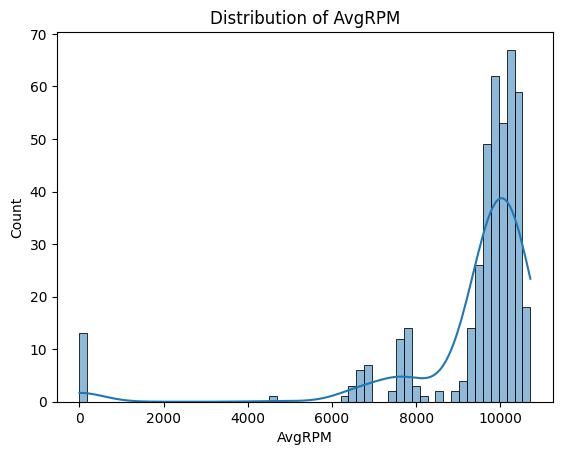

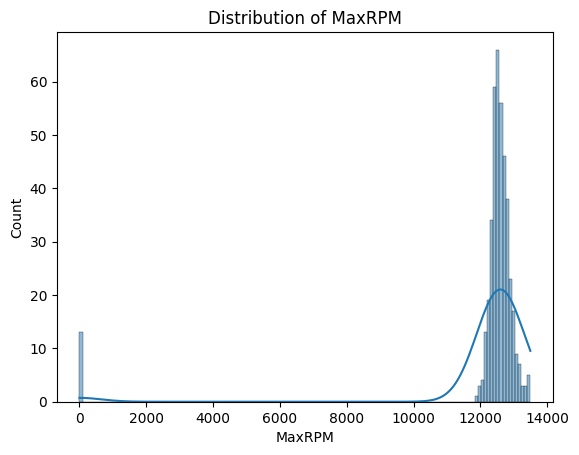

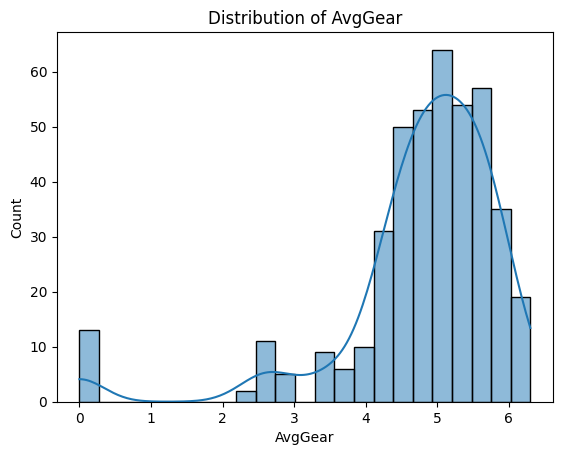

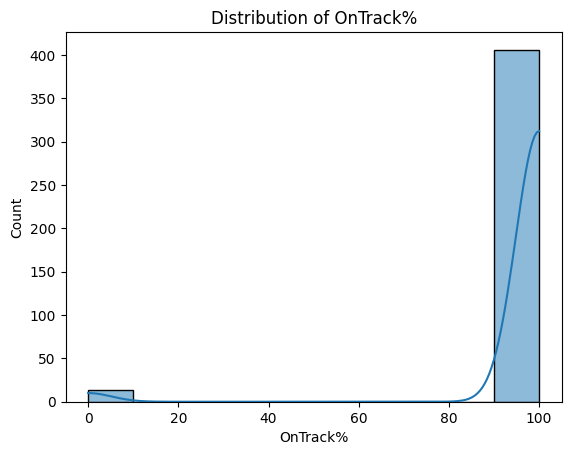

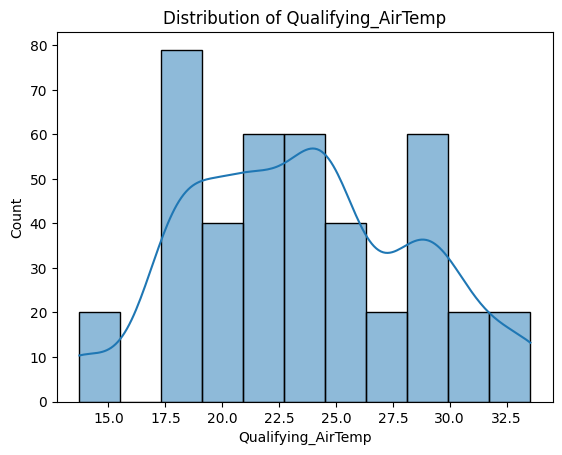

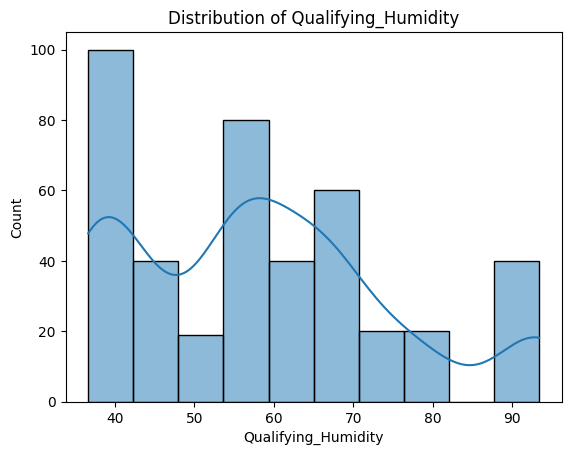

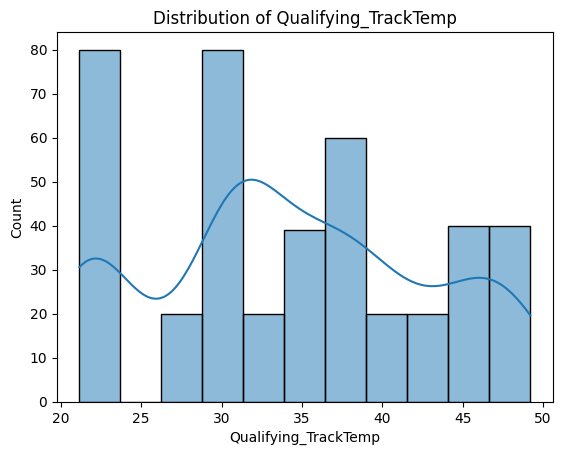

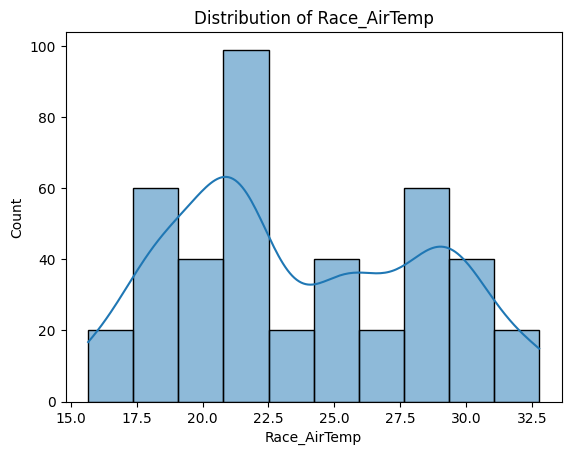

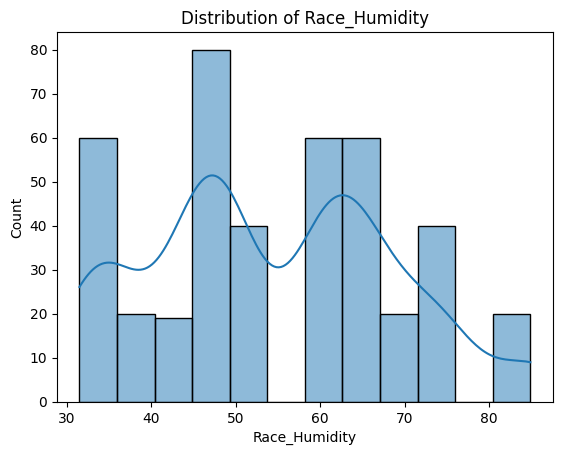

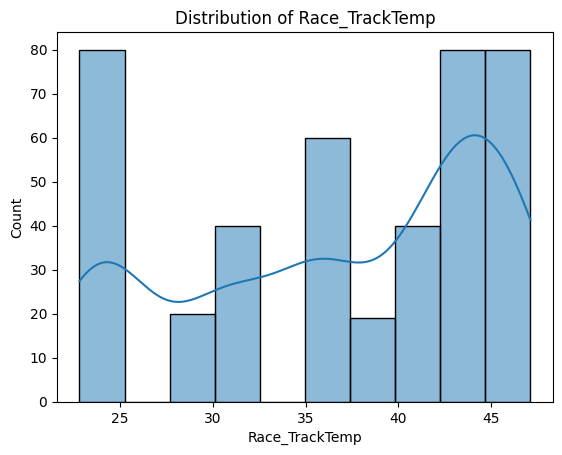

In [162]:
import seaborn as sns

# Visualize feature distributions
for col in numerical_features:
    sns.histplot(data_only_2024[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


In [163]:
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.utils.validation import check_is_fitted

class PyTorchRegressorWrapper(BaseEstimator, RegressorMixin):
    def __init__(self, model):
        self.model = model.eval()  # Ensure the model is in evaluation mode
        self.device = next(model.parameters()).device  # Get the device (CPU, GPU)

    def fit(self, X, y):
        # The model is already trained; just store the number of features
        self.n_features_in_ = X.shape[1]
        return self

    def predict(self, X):
        check_is_fitted(self, 'n_features_in_')
        with torch.no_grad():
            X_tensor = torch.tensor(X, dtype=torch.float32).to(self.device)
            preds = self.model(X_tensor)
            # For quantile regression, take the mean of the lower and upper quantile predictions
            preds_mean = preds.mean(dim=1).cpu().numpy()
        return preds_mean


In [165]:
from sklearn.inspection import permutation_importance

# Create the estimator
estimator = PyTorchRegressorWrapper(model)

estimator.fit(X_train_processed, y_train)

# Compute permutation importance
result = permutation_importance(
    estimator, X_test_processed, y_test_np, n_repeats=10, random_state=42, scoring='neg_mean_absolute_error'
)

# Extract feature names from the preprocessor
feature_names = preprocessor.get_feature_names_out()


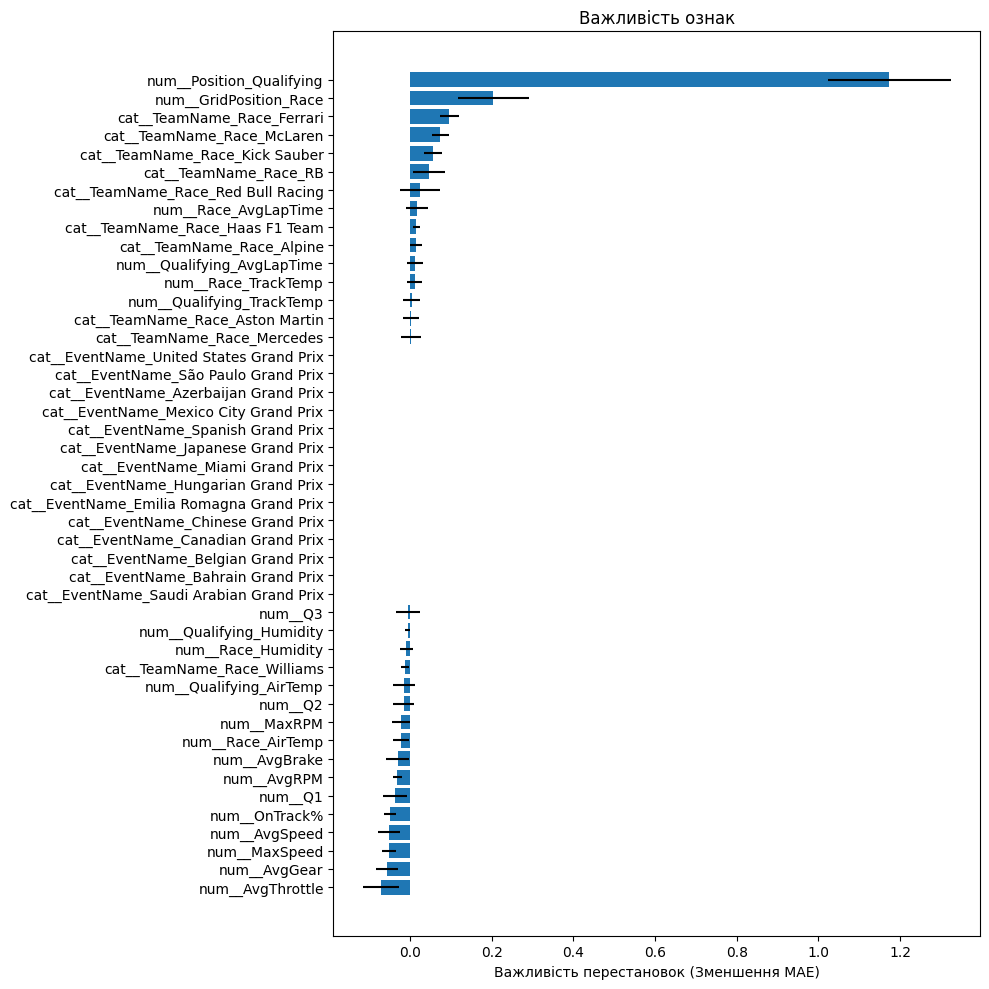

In [190]:
import numpy as np
import matplotlib.pyplot as plt

# Sort the importances
sorted_idx = result.importances_mean.argsort()

plt.figure(figsize=(10, 10))
plt.barh(range(len(sorted_idx)), result.importances_mean[sorted_idx], xerr=result.importances_std[sorted_idx])
plt.yticks(range(len(sorted_idx)), np.array(feature_names)[sorted_idx])
plt.xlabel('Важливість перестановок (Зменшення MAE)')
plt.title('Важливість ознак')
plt.tight_layout()
plt.show()


In [167]:
import shap

# Define a prediction function for SHAP
def model_predict_mean(X):
    X_tensor = torch.tensor(X, dtype=torch.float32).to(estimator.device)
    with torch.no_grad():
        preds = estimator.model(X_tensor)
        preds_mean = preds.mean(dim=1).cpu().numpy()
    return preds_mean

# Create a SHAP explainer using a subset of the data for efficiency
explainer = shap.Explainer(model_predict_mean, X_train_processed[:100])

# Compute SHAP values for the test set
shap_values = explainer(X_test_processed[:100])


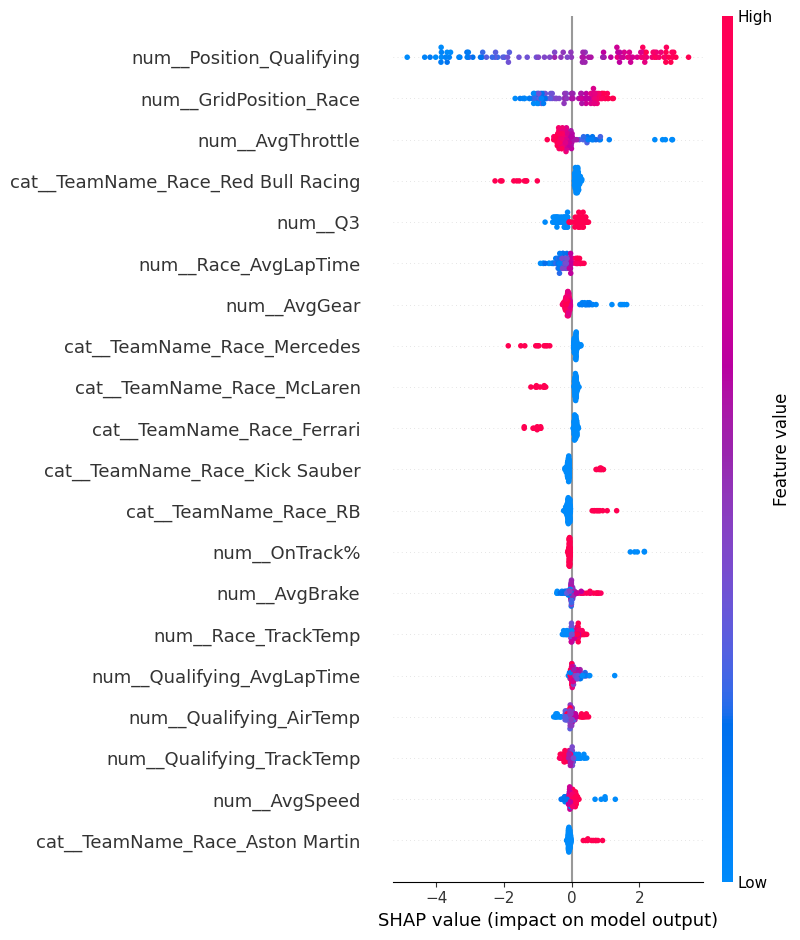

In [168]:
shap.summary_plot(shap_values, X_test_processed[:100], feature_names=feature_names)


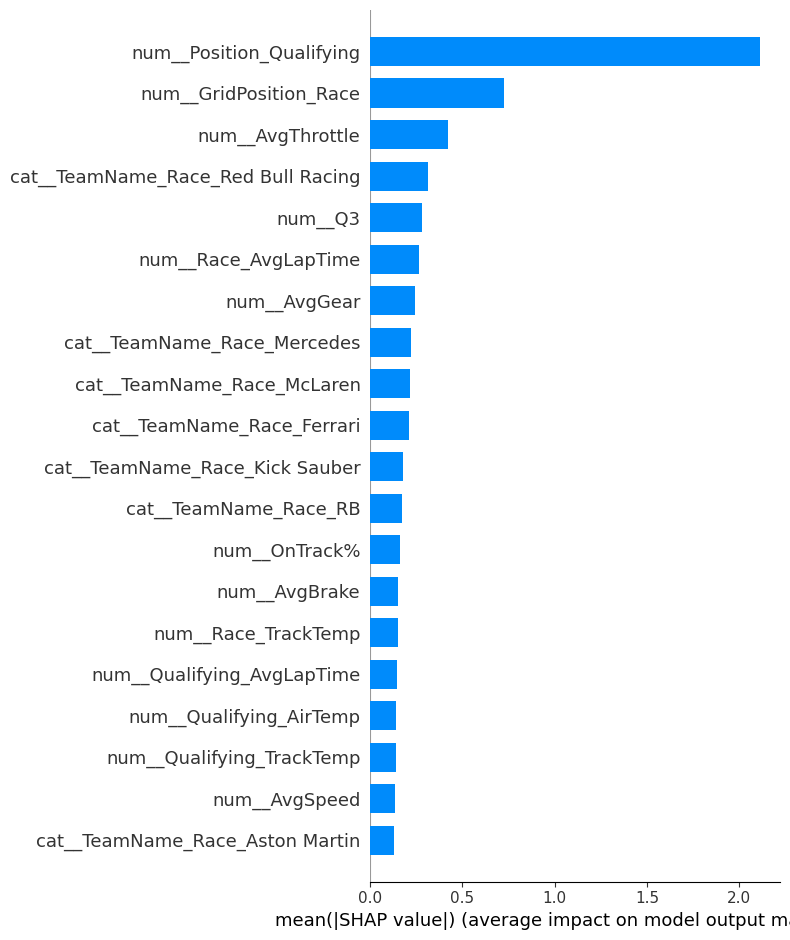

In [169]:
shap.summary_plot(shap_values, X_test_processed[:100], feature_names=feature_names, plot_type='bar')


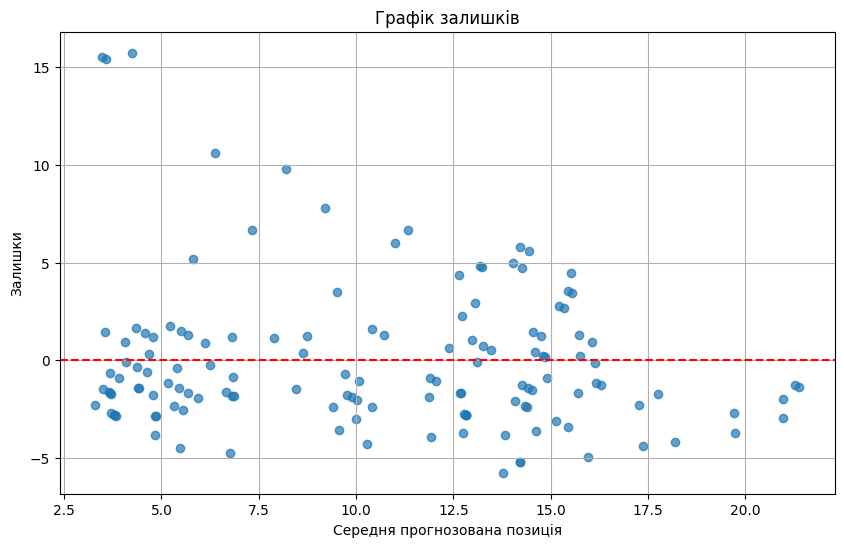

In [188]:
import matplotlib.pyplot as plt

# Calculate residuals using the mean prediction
y_pred_mean = (y_pred_lower + y_pred_upper) / 2
residuals = y_test_np - y_pred_mean

plt.figure(figsize=(10, 6))
plt.scatter(y_pred_mean, residuals, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Середня прогнозована позиція')
plt.ylabel('Залишки')
plt.title('Графік залишків')
plt.grid(True)
plt.show()


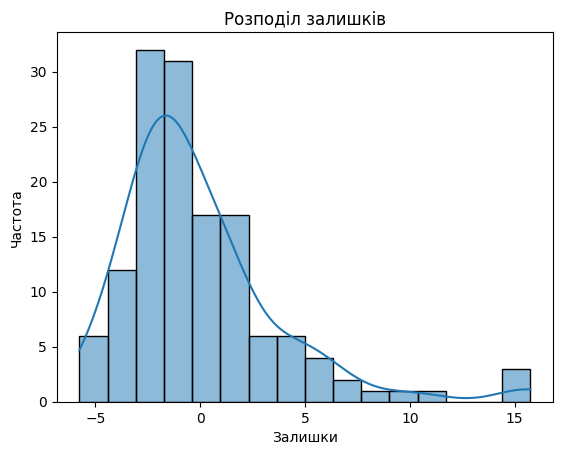

In [189]:
import seaborn as sns

sns.histplot(residuals, kde=True)
plt.title('Розподіл залишків')
plt.xlabel('Залишки')
plt.ylabel('Частота')
plt.show()
